In [25]:
# Import the Earth Engine Python Package into Python environment.
import ee

# Import another usefull things
import datetime
from IPython.html import widgets
from IPython.display import display
from IPython.display import Image
from IPython.utils import traitlets
from IPython.core.display import Javascript
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sql2gee import SQL2GEE

In [4]:
# Initialize the Earth Engine object, using the authentication credentials.
ee.Initialize()

In [30]:
tableName='JRC/GSW1_0/GlobalSurfaceWater'

In [31]:
# Print the information for an image asset.
image = ee.Image(tableName)
image.getInfo()

{u'bands': [{u'crs': u'EPSG:4326',
   u'crs_transform': [0.00026949458523585647,
    0.0,
    -180.00001488697754,
    0.0,
    -0.00026949458523585647,
    78.00008729939917],
   u'data_type': {u'max': 127,
    u'min': -128,
    u'precision': u'int',
    u'type': u'PixelType'},
   u'dimensions': [1335834, 508360],
   u'id': u'occurrence'},
  {u'crs': u'EPSG:4326',
   u'crs_transform': [0.00026949458523585647,
    0.0,
    -180.00001488697754,
    0.0,
    -0.00026949458523585647,
    78.00008729939917],
   u'data_type': {u'max': 127,
    u'min': -128,
    u'precision': u'int',
    u'type': u'PixelType'},
   u'dimensions': [1335834, 508360],
   u'id': u'change_abs'},
  {u'crs': u'EPSG:4326',
   u'crs_transform': [0.00026949458523585647,
    0.0,
    -180.00001488697754,
    0.0,
    -0.00026949458523585647,
    78.00008729939917],
   u'data_type': {u'max': 127,
    u'min': -128,
    u'precision': u'int',
    u'type': u'PixelType'},
   u'dimensions': [1335834, 508360],
   u'id': u'chang

In [37]:
sql = 'SELECT ST_METADATA(rast) from '+tableName
q = SQL2GEE(sql)
q.response

{u'date_range': [448243200000.0, 1445126400000.0],
 u'description': u" This dataset contains maps of the location and temporal distribution of surface water from 1984 to 2015 and provides statistics on the extent and change of those water surfaces.  For more information see the associated journal article: <a href='http://www.nature.com/nature/journal/v540/n7633/full/nature20584.html'> High-resolution mapping of global surface water and its long-term changes</a> (Nature, 2016) and the online <a href='https://storage.googleapis.com/global-surface-water/downloads_ancillary/DataUsersGuidev2.pdf'> Data Users Guide</a>. <p> These data were generated using 3,066,102 scenes from Landsat 5, 7 and 8 acquired between 16 March 1984 and 10 October 2015.  Each pixel was individually classified into water / non-water using an expert system and the results were collated into a monthly history for the entire time period and two epochs (1984-1999,  2000-2015) for change detection. <p>  The mapping layer

This dataset contains maps of the location and temporal distribution of surface water from 1984 to 2015 and provides statistics on the extent and change of those water surfaces.  For more information see the associated journal article: <a href='http://www.nature.com/nature/journal/v540/n7633/full/nature20584.html'> High-resolution mapping of global surface water and its long-term changes</a> (Nature, 2016) and the online <a href='https://storage.googleapis.com/global-surface-water/downloads_ancillary/DataUsersGuidev2.pdf'> Data Users Guide</a>. <p> These data were generated using 3,066,102 scenes from Landsat 5, 7 and 8 acquired between 16 March 1984 and 10 October 2015.  Each pixel was individually classified into water / non-water using an expert system and the results were collated into a monthly history for the entire time period and two epochs (1984-1999,  2000-2015) for change detection. <p>  The mapping layers product consists of 1 image containing 7 bands. It maps different facets of the spatial and temporal distribution of surface water over the last 32 years.  Areas where water has never been detected are masked.<p> <table class='eecat'> <tr> <th>Band Name</th> <th>Description</th> <th>Units or Label</th> </tr> <tr> <td>occurrence</td> <td>The frequency with which water was present.</td> <td>0 to 100 (percentage)</td> </tr><tr> <td>change_abs</td> <td>Absolute change in occurrence between two epochs: 1984-1999 vs 2000-2015. </td> <td>-100 to 100 (percentage)</td> </tr><tr> <td>change_norm</td> <td>Normalized change in occurrence. (epoch1-epoch2) /(epoch1+epoch2) * 100 </td> <td>-100 to 100 (percentage)</td> </tr><tr> <td>seasonality</td> <td>Number of months water is present</td> <td>0 to 12</td> </tr><tr> <td>recurrence</td> <td>The frequency with which water returns from year to year.</td> <td>0 to 100 (percentage)</td> </tr> <tr> <td>transition</td> <td>Categorical classification of change between first and last year.</td> <td class='nobreak'>0 - No change<br> 1 - Permanent<br> 2 - New permanent<br> 3 - Lost permanent<br> 4 - Seasonal<br> 5 - New seasonal<br> 6 - Lost seasonal<br> 7 - Seasonal to permanent<br> 8 - Permanent to seasonal<br> 9 - Ephemeral permanent<br> 10 - Ephemeral seasonal<br></td> <tr> <td>max_extent</td> <td>Binary image containing 1 anywhere water has ever been detected.</td> <td class='nobreak'>0 - No water<br> 1 - Water </td> </tr> <table class='eecat'><p><style> table.eecat { border: 1px solid black; border-collapse: collapse; } table.eecat td, tr, th { text-align: left; vertical-align: top;   border: 1px solid gray; padding: 3px;} td.nobreak { white-space: nowrap; } </style> 

In [12]:
q.response['transition_class_names']

[u'No change',
 u'Permanent',
 u'New permanent',
 u'Lost permanent',
 u'Seasonal',
 u'New seasonal',
 u'Lost seasonal',
 u'Seasonal to permanent',
 u'Permanent to seasonal',
 u'Ephemeral permanent',
 u'Ephemeral seasonal',
 u'No Data']

In [38]:
sql = 'SELECT ST_METADATA(rast) from '+tableName
q = SQL2GEE(sql)
q.response
for band in q._band_names:
    print(band)

occurrence
change_abs
change_norm
seasonality
recurrence
transition
max_extent


In [39]:
#Maximum Water Extent (1984-2015) 
sql = 'SELECT ST_BANDMETADATA(rast, occurrence) from '+tableName # could use either 1 or the name of the band (elevation)
q = SQL2GEE(sql)
q.response

{u'crs': u'EPSG:4326',
 u'crs_transform': [0.00026949458523585647,
  0.0,
  -180.00001488697754,
  0.0,
  -0.00026949458523585647,
  78.00008729939917],
 u'data_type': {u'max': 127,
  u'min': -128,
  u'precision': u'int',
  u'type': u'PixelType'},
 u'dimensions': [1335834, 508360],
 u'id': u'occurrence'}

In [40]:
#Summary Statistics over an Image of max_extent 
sql = 'SELECT ST_SUMMARYSTATS() from '+tableName
q = SQL2GEE(sql)
q.response['occurrence']

{'count': 381387,
 'max': 100,
 'mean': 46.76624006586486,
 'min': 1,
 'stdev': 32.74991341235111,
 'sum': 17836036.0}

In [41]:
#Histogram information over an Image Band
sql = 'SELECT ST_HISTOGRAM(rast, 1, auto, true) from '+tableName
q = SQL2GEE(sql)
q.response

{u'occurrence': [[1.0, 66555.0],
  [2.754385964912281, 75776.0],
  [4.508771929824562, 74709.0],
  [6.263157894736842, 71699.0],
  [8.017543859649123, 35136.0],
  [9.771929824561402, 70238.0],
  [11.526315789473683, 68825.0],
  [13.280701754385964, 66332.0],
  [15.035087719298245, 32270.0],
  [16.789473684210527, 60183.0],
  [18.543859649122805, 56617.0],
  [20.298245614035086, 52914.0],
  [22.052631578947366, 24710.0],
  [23.807017543859647, 47552.0],
  [25.561403508771928, 43710.0],
  [27.31578947368421, 40475.0],
  [29.07017543859649, 19500.0],
  [30.82456140350877, 35678.0],
  [32.578947368421055, 33818.0],
  [34.33333333333333, 32088.0],
  [36.08771929824561, 15568.0],
  [37.84210526315789, 29374.0],
  [39.59649122807017, 28509.0],
  [41.35087719298245, 27583.0],
  [43.10526315789473, 13437.0],
  [44.859649122807014, 26501.0],
  [46.614035087719294, 25892.0],
  [48.368421052631575, 25716.0],
  [50.122807017543856, 12703.0],
  [51.87719298245614, 25714.0],
  [53.63157894736842, 253

In [17]:
values = q.response.values()
val = values[0]

In [18]:
lista_a = []
for i in range(0,len(val)):
    a = val[i][0]
    lista_a.append(a)

lista_b = []
for i in range(0,len(val)):
    a = val[i][1]
    lista_b.append(a)

In [22]:
raw_data = {'VAL_1': lista_a, 'VAL_2': lista_b}
df = pd.DataFrame(raw_data, columns = ['VAL_1', 'VAL_2' ])
df.head(2)

,VAL_1,VAL_2
0,1.000000,66555.0
1,2.754386,75776.0


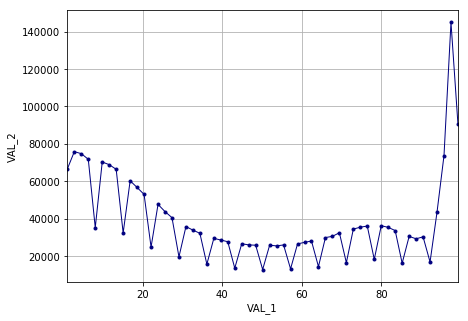

In [26]:
df.plot(x='VAL_1', y='VAL_2', figsize=(7,5), grid=True, lw=1, colormap='jet', marker='.', legend=False)
plt.xlabel('VAL_1')
plt.ylabel('VAL_2')

In [24]:
# Passing a Geojson via SQL
#Geojson can be created directly using POSTGIS-like functions via ST_GeomFromGeoJSON, as shown below. 
#Currently, SQL2GEE only supports arguments in the form of ST_INTERSECTS(ST_SetSRID(ST_GeomFromGeoJSON([args]*), 
#and only for EPSG:4326.

In [49]:
sql = ''.join(["SELECT ST_SUMMARYSTATS() FROM "+tableName+" WHERE ST_INTERSECTS(ST_SetSRID(ST_GeomFromGeoJSON(",
                '{"type":"MultiPolygon","coordinates":[[[[-61.39027142,8.58058085],[-61.36986397,8.57133139],[-61.34435088,8.57300922],[-61.3146026,8.57131415],[-61.30526327,8.55281855],[-61.30442238,8.536009],[-61.30273731,8.51499048],[-61.29084843,8.50237095],[-61.27640426,8.49647816],[-61.26026411,8.48637708],[-61.25942551,8.47207404],[-61.26368804,8.4560885],[-61.27644288,8.45020188],[-61.29343794,8.45693949],[-61.31722341,8.47545741],[-61.32570681,8.49480883],[-61.3384443,8.50995248],[-61.36563463,8.50997219],[-61.40050395,8.50828383],[-61.43368759,8.51415401],[-61.45412019,8.53095766],[-61.46858496,8.54104609],[-61.48986341,8.55113245],[-61.50859635,8.55280763],[-61.54011635,8.56541053],[-61.53584748,8.57550918],[-61.51539728,8.57299486],[-61.47623033,8.56711839],[-61.43876942,8.56881035],[-61.41578787,8.58226482],[-61.39027142,8.58058085]]],[[[-60.9925431,8.57672761],[-61.005686,8.55353425],[-61.02769935,8.54311758],[-61.05064857,8.55548737],[-61.05199134,8.54193757],[-61.04377194,8.5286319],[-61.04157467,8.51854076],[-61.12637285,8.50706615],[-61.23281816,8.51605866],[-61.27037513,8.51455313],[-61.25942949,8.5368513],[-61.24608314,8.55727774],[-61.22760983,8.57160065],[-61.20148678,8.57599518],[-61.18024655,8.56964753],[-61.14818275,8.54385],[-61.12637285,8.53436921],[-61.13817298,8.55068594],[-61.14000404,8.55174388],[-61.13784746,8.55975983],[-61.1331681,8.56537507],[-61.12852943,8.56928132],[-61.12637285,8.57257722],[-61.09845944,8.60268789],[-61.08674069,8.60683828],[-61.02179928,8.61098867],[-61.01646888,8.61009349],[-61.01097572,8.60805899],[-61.00772051,8.60590241],[-61.00373288,8.60398998],[-60.99600176,8.60268789],[-60.9925431,8.57672761]]],[[[-60.67875696,8.69316707],[-60.66602201,8.68641794],[-60.63541099,8.68718918],[-60.61161088,8.68377118],[-60.60484457,8.6711505],[-60.60828853,8.65435441],[-60.61767711,8.63672273],[-60.63213512,8.63339156],[-60.65083411,8.6342706],[-60.67377154,8.64188772],[-60.69417239,8.64277061],[-60.71373771,8.63776376],[-60.73584481,8.63696603],[-60.75710067,8.63784455],[-60.77157085,8.63114408],[-60.79027993,8.63117572],[-60.80813448,8.63288828],[-60.80981377,8.64214144],[-60.79787763,8.65641388],[-60.7867824,8.67488966],[-60.77312929,8.69672023],[-60.76033259,8.71770775],[-60.74502391,8.71935882],[-60.72716218,8.72184455],[-60.71438111,8.73442494],[-60.69735373,8.74447446],[-60.68371973,8.75789158],[-60.67605594,8.76291727],[-60.67181168,8.75954695],[-60.6769373,8.74863353],[-60.68718168,8.73016589],[-60.68722529,8.70999523],[-60.67875696,8.69316707]]],[[[-60.72808457,8.87851647],[-60.73759806,8.8666135],[-60.73158262,8.85808662],[-60.71779483,8.85294948],[-60.71096389,8.82398097],[-60.6980485,8.81117905],[-60.68604289,8.78901468],[-60.69899417,8.77797286],[-60.72402223,8.76270147],[-60.74816269,8.76020284],[-60.76973497,8.74151139],[-60.78356748,8.71513966],[-60.79911191,8.69387917],[-60.80689574,8.67258873],[-60.82760429,8.65132366],[-60.846576,8.63771526],[-60.88448477,8.63522629],[-60.92065846,8.63954606],[-60.94737205,8.63447095],[-60.96891465,8.62939514],[-61.00335366,8.63967068],[-61.05420719,8.63884269],[-61.09387414,8.63374413],[-61.11201352,8.62350462],[-61.13016617,8.60984709],[-61.14227043,8.60215804],[-61.15264593,8.59617555],[-61.16991475,8.59531359],[-61.17679995,8.60384838],[-61.17416562,8.62432985],[-61.17154766,8.63798066],[-61.16710822,8.69938542],[-61.15498148,8.7223998],[-61.12643995,8.7564781],[-61.09534313,8.77946075],[-61.05996897,8.79816346],[-61.0315154,8.80834938],[-60.99702944,8.8210779],[-60.95136115,8.82782513],[-60.9048348,8.83371434],[-60.88328908,8.84048914],[-60.87206103,8.85749383],[-60.86169946,8.87024514],[-60.77810633,8.8700977],[-60.75652808,8.88282869],[-60.73236548,8.8921495],[-60.72808457,8.87851647]]],[[[-61.06773841,8.82807038],[-61.0916235,8.82241445],[-61.03526771,8.86318594],[-61.01671302,8.88031647],[-60.98281816,8.93016185],[-60.97134355,8.96332429],[-60.9612931,8.9731306],[-60.94884193,8.98114655],[-60.93765215,8.99062735],[-60.93370521,9.00088125],[-60.93492591,9.00983307],[-60.93325762,9.01874421],[-60.92027747,9.02846914],[-60.89757239,9.03339265],[-60.87547767,9.02798086],[-60.85533607,9.01581452],[-60.83836829,9.00055573],[-60.85928301,8.99469636],[-60.86571204,8.99433015],[-60.85081946,8.97064851],[-60.86497962,8.94122956],[-60.89167233,8.91437409],[-60.93358314,8.88393789],[-61.06773841,8.82807038]]],[[[-60.85533607,9.06964753],[-60.85887611,9.0619571],[-60.85887611,9.06940339],[-60.86656654,9.05174388],[-60.87564043,9.04364655],[-60.88927161,9.0414086],[-60.9107153,9.04148998],[-60.92707272,9.0368513],[-60.94298255,9.02582429],[-61.027089,8.94867585],[-61.03221595,8.93988679],[-61.03844154,8.91986726],[-61.04381263,8.91176992],[-61.07713782,8.89313386],[-61.08543861,8.89069245],[-61.09658769,8.90058014],[-61.0928849,8.92007071],[-61.08372962,8.94293854],[-61.07852129,8.96295808],[-61.06932532,8.97882722],[-61.04751543,8.98729076],[-61.0221248,8.99306875],[-61.00226803,9.00055573],[-60.98412025,9.01894766],[-60.9468888,9.06610749],[-60.93081621,9.07562897],[-60.90636146,9.07770417],[-60.85204017,9.09613679],[-60.85204017,9.08673737],[-60.85309811,9.07794831],[-60.85533607,9.06964753]]],[[[-60.86245683,9.12592194],[-60.87315833,9.11041901],[-60.87315833,9.11660391],[-60.8897192,9.09857819],[-60.93968665,9.0820987],[-60.9612931,9.06940339],[-60.94383704,9.10398998],[-60.94229082,9.13662344],[-60.93675697,9.16461823],[-60.90729733,9.18549226],[-60.87214108,9.1947696],[-60.85334225,9.19403718],[-60.84520423,9.18235912],[-60.84748288,9.16303132],[-60.85358639,9.14386628],[-60.86245683,9.12592194]]],[[[-60.72850501,9.19293854],[-60.7392472,9.1881778],[-60.75283769,9.18732331],[-60.76952064,9.18919505],[-60.79743405,9.17182038],[-60.80516517,9.15721263],[-60.81224525,9.13825104],[-60.82380124,9.12230052],[-60.84520423,9.11660391],[-60.83690345,9.14203522],[-60.82896888,9.18768952],[-60.81786048,9.20600007],[-60.80288652,9.21759675],[-60.78050697,9.22874584],[-60.75792396,9.23041413],[-60.74217689,9.21344636],[-60.73900306,9.20892976],[-60.73363196,9.19879792],[-60.72850501,9.19293854]]],[[[-66.81480872,11.8732364],[-66.73338783,11.8699405],[-66.71605384,11.87059154],[-66.71178138,11.86790599],[-66.73704993,11.86530183],[-66.74058997,11.86587149],[-66.75381426,11.86237214],[-66.77106686,11.86587149],[-66.78042559,11.86587149],[-66.78709876,11.86835358],[-66.81786048,11.87107982],[-66.81480872,11.8732364]]],[[[-67.63760332,11.98004792],[-67.64622962,11.97866446],[-67.66588294,11.98200104],[-67.67365475,11.98533763],[-67.67487546,11.98965078],[-67.67198646,11.99310944],[-67.66714434,11.99176667],[-67.66266842,11.9875349],[-67.65802975,11.98493073],[-67.64899655,11.98395417],[-67.63760332,11.98004792]]],[[[-63.63988196,15.69603099],[-63.64362545,15.70058828],[-63.63963782,15.70294831],[-63.63459225,15.70058828],[-63.63394121,15.69619375],[-63.63548743,15.69403718],[-63.63988196,15.69603099]]],[[[-67.67906654,12.02814362],[-67.68040931,12.02505117],[-67.68154863,12.0257836],[-67.67906654,12.02814362]]],[[[-67.67638099,12.0278181],[-67.67666582,12.02692292],[-67.67760169,12.0278181],[-67.67723548,12.03001537],[-67.67638099,12.0278181]]],[[[-67.674672,12.04840729],[-67.67609616,12.04441966],[-67.67699134,12.0463321],[-67.67723548,12.05023835],[-67.674672,12.04840729]]],[[[-67.68138587,12.06370677],[-67.68101966,12.06183503],[-67.68443763,12.06346263],[-67.68138587,12.06370677]]],[[[-67.68708249,12.06753164],[-67.68732663,12.06557852],[-67.68883216,12.06899649],[-67.68708249,12.06753164]]],[[[-65.24469967,10.95465729],[-65.22760983,10.9538028],[-65.21983802,10.95429108],[-65.21133379,10.95384349],[-65.20824134,10.94989655],[-65.21670488,10.93960196],[-65.20197506,10.91815827],[-65.20494544,10.90436433],[-65.22081458,10.89451732],[-65.24461829,10.88495515],[-65.24071204,10.89484284],[-65.23786374,10.89858633],[-65.25877845,10.89142487],[-65.27696693,10.88955313],[-65.31663978,10.89109935],[-65.33657793,10.89594147],[-65.35505124,10.90517813],[-65.37218177,10.91095612],[-65.38805091,10.90546296],[-65.41177324,10.92475007],[-65.40192624,10.94843171],[-65.37669837,10.96605052],[-65.35448158,10.96747468],[-65.32990475,10.97760651],[-65.3062638,10.97646719],[-65.25495358,10.95652904],[-65.24469967,10.95465729]]],[[[-64.190297,10.82811107],[-64.17218991,10.82680899],[-64.16860918,10.82794831],[-64.15953529,10.82489655],[-64.15587318,10.8119571],[-64.17479408,10.7992211],[-64.2018123,10.79706452],[-64.22093665,10.80646393],[-64.21825111,10.82103099],[-64.20343991,10.82729727],[-64.190297,10.82811107]]],[[[-63.79344642,11.00112539],[-63.78766842,10.97378164],[-63.81956946,10.9805362],[-63.81908118,10.9739444],[-63.82005775,10.9603946],[-63.81956946,10.9538028],[-63.8342179,10.96442292],[-63.84292558,10.96775951],[-63.84683184,10.96377188],[-63.84996497,10.9575056],[-63.87169349,10.93740469],[-63.89806068,10.88495515],[-63.95563717,10.89435456],[-63.97655189,10.89109935],[-64.04263262,10.86847565],[-64.05972246,10.8576114],[-64.05687415,10.88711172],[-64.07420814,10.89093659],[-64.09609941,10.89093659],[-64.11636308,10.92861563],[-64.13784746,10.94358959],[-64.1611222,10.95595938],[-64.17585202,10.96747468],[-64.20295163,10.94440339],[-64.22435462,10.93935782],[-64.29751543,10.94741446],[-64.30260169,10.9496931],[-64.30663001,10.95213451],[-64.31236732,10.9538028],[-64.33800208,10.95294831],[-64.34715736,10.9538028],[-64.38902747,10.96605052],[-64.40855872,10.96747468],[-64.38394121,11.01984284],[-64.38060462,11.03237539],[-64.37832598,11.05353425],[-64.37059486,11.06248607],[-64.35606849,11.06419505],[-64.33348548,11.06366608],[-64.32262122,11.06574128],[-64.31476803,11.06952546],[-64.30211341,11.0804711],[-64.2918595,11.08392975],[-64.27139238,11.07697175],[-64.24445553,11.08812084],[-64.22008216,11.0915388],[-64.19831295,11.08763255],[-64.18883216,11.07363516],[-64.18936113,11.06102123],[-64.18830319,11.0463321],[-64.18163001,11.03408438],[-64.1475317,11.02358633],[-64.11070716,11.00018952],[-64.08983314,10.99481843],[-64.04906165,10.99070873],[-64.03197181,10.99599844],[-64.01756751,11.01528555],[-64.01573646,11.02570222],[-64.01756751,11.05621979],[-64.01134193,11.065253],[-63.99693763,11.07672761],[-63.99083411,11.08356354],[-63.98672441,11.09454987],[-63.987172,11.1022403],[-63.98582923,11.10927969],[-63.97655189,11.11831289],[-63.96808834,11.12107982],[-63.94505775,11.1223819],[-63.93561764,11.12514883],[-63.92096921,11.13764069],[-63.89610755,11.1680362],[-63.88097083,11.1791446],[-63.87743079,11.16120026],[-63.8654679,11.1515974],[-63.85285397,11.14484284],[-63.84683184,11.13540274],[-63.84357663,11.11489492],[-63.82900957,11.07778555],[-63.82575436,11.06000397],[-63.79344642,11.00112539]]],[[[-66.80842038,11.75120677],[-66.82778887,11.74624258],[-66.85106361,11.74701569],[-66.85460365,11.75136953],[-66.83315996,11.74909089],[-66.818186,11.75104401],[-66.8095597,11.75295645],[-66.74998939,11.77757396],[-66.73582923,11.78310782],[-66.72850501,11.7835961],[-66.72801673,11.78204987],[-66.77521725,11.76276276],[-66.7799373,11.75853099],[-66.80842038,11.75120677]]],[[[-64.55284583,11.82371654],[-64.5628556,11.81659577],[-64.60558021,11.81801992],[-64.62930254,11.82196686],[-64.6487931,11.83026765],[-64.6459041,11.8382836],[-64.64439857,11.840725],[-64.6450903,11.8432071],[-64.6487931,11.85130443],[-64.63565019,11.86139558],[-64.61888587,11.88922761],[-64.60716712,11.8991153],[-64.59463457,11.89248281],[-64.5628556,11.86810944],[-64.55679277,11.85732657],[-64.5521541,11.8399112],[-64.55284583,11.82371654]]],[[[-66.60826575,11.78310782],[-66.59276283,11.78253815],[-66.58779863,11.78310782],[-66.60651608,11.76723867],[-66.64183509,11.76146068],[-66.67943275,11.76654694],[-66.70449785,11.78310782],[-66.67414303,11.77602774],[-66.65086829,11.78017813],[-66.63198808,11.79596589],[-66.61510169,11.82404206],[-66.60627194,11.81736888],[-66.60138913,11.80670808],[-66.60167396,11.79450104],[-66.60826575,11.78310782]]],[[[-66.1085099,11.82583242],[-66.10293535,11.81928132],[-66.10118568,11.79979076],[-66.11400306,11.77993399],[-66.14313717,11.78180573],[-66.17454993,11.79710521],[-66.19432532,11.8176944],[-66.17955482,11.82318757],[-66.16197669,11.82477448],[-66.13219154,11.82404206],[-66.1085099,11.82583242]]],[[[-64.64802419,4.20790454],[-64.66098385,4.22746918],[-64.69987036,4.26415944],[-64.7459399,4.28762055],[-64.79162187,4.28441661],[-64.80505774,4.27188507],[-64.81291256,4.25279063],[-64.81554805,4.23103485],[-64.81304175,4.21057098],[-64.80125952,4.18853099],[-64.7836637,4.17708466],[-64.76294145,4.16899729],[-64.74190914,4.15718923],[-64.72710384,4.14078196],[-64.71953324,4.12323781],[-64.70744096,4.08295603],[-64.66289587,3.99699229],[-64.6428971,3.97296275],[-64.59610409,3.93588491],[-64.57496843,3.91420665],[-64.53143103,3.85351268],[-64.43453772,3.7784785],[-64.39448848,3.75607676],[-64.34735958,3.73830007],[-64.32415686,3.72411489],[-64.26555579,3.65220713],[-64.22209591,3.6162145],[-64.20297563,3.5947171],[-64.19574093,3.57006744],[-64.19563757,3.53291209],[-64.19785966,3.51508372],[-64.20506852,3.49707448],[-64.23212114,3.46113353],[-64.24214636,3.44296926],[-64.24560868,3.41893972],[-64.21987382,3.29287506],[-64.21630815,3.25143056],[-64.22537736,3.16559601],[-64.22292273,3.12399648],[-64.20530107,3.08916657],[-64.17346838,3.05190786],[-64.13750159,2.98726064],[-64.10595313,2.94721141],[-64.02908443,2.79796987],[-64.01223792,2.74401967],[-64.0008691,2.72536448],[-63.99756181,2.71492584],[-63.99787187,2.70598582],[-64.00443477,2.67952749],[-64.00769039,2.62278676],[-64.01218624,2.60376984],[-64.05053015,2.53467845],[-64.05781653,2.5104422],[-64.05662797,2.48853139],[-64.04797217,2.47132314],[-64.03249508,2.46300324],[-64.01079098,2.46817088],[-63.95182817,2.46150462],[-63.83131873,2.42863841],[-63.76703324,2.4293102],[-63.70409135,2.43757843],[-63.57381506,2.43437449],[-63.51066646,2.42465932],[-63.38483435,2.42057688],[-63.36488725,2.4130838],[-63.36111487,2.40000966],[-63.37124345,2.36512807],[-63.37279374,2.34910838],[-63.37051998,2.28115387],[-63.37263871,2.2668395],[-63.40059566,2.20462107],[-63.40390295,2.18849803],[-63.40219763,2.17051463],[-63.41175777,2.14937897],[-63.44343543,2.13718333],[-63.51066646,2.12460012],[-63.52053666,2.12449676],[-63.5489587,2.1283725],[-63.56198116,2.12635712],[-63.61753333,2.10116486],[-63.76264075,1.98566803],[-63.78320797,1.97499685],[-63.80227657,1.97230967],[-63.92082231,1.97432505],[-63.9583394,1.9707077],[-63.99502966,1.95802114],[-64.03662919,1.92727366],[-64.0536049,1.89370982],[-64.060297,1.80746185],[-64.07595496,1.74537262],[-64.07254431,1.6845753],[-64.07541235,1.66542918],[-64.08086422,1.6473941],[-64.0929565,1.62261526],[-64.10954464,1.59845652],[-64.12972428,1.57807017],[-64.17708573,1.55114675],[-64.23214697,1.49714488],[-64.30152258,1.446657],[-64.3218831,1.42443614],[-64.340745,1.38420603],[-64.35294063,1.36583506],[-64.37009721,1.35872955],[-64.38957922,1.36929738],[-64.39477271,1.39219004],[-64.39136206,1.4177182],[-64.3850317,1.43639923],[-64.36381852,1.4773528],[-64.36459367,1.4970932],[-64.38642696,1.51024485],[-64.40900956,1.507506],[-64.43309078,1.49404429],[-64.47505204,1.46301259],[-64.52791703,1.43572744],[-64.55119727,1.41952688],[-64.57026587,1.39549734],[-64.59116899,1.35009959],[-64.60421729,1.33128937],[-64.73087622,1.24757355],[-64.7512109,1.24333608],[-64.77131303,1.24674672],[-64.82143917,1.27056956],[-64.83929338,1.27082794],[-64.85531307,1.25868398],[-64.8777148,1.23491282],[-64.89740352,1.21966827],[-64.91466345,1.21475901],[-64.93293107,1.21300202],[-64.95605627,1.20680084],[-64.96646908,1.20059967],[-64.99936112,1.17197093],[-65.00334021,1.16938711],[-65.01321041,1.16576976],[-65.01744788,1.16297923],[-65.0196958,1.15770823],[-65.02070349,1.14401398],[-65.02248633,1.13998322],[-65.05961584,1.13238678],[-65.10051774,1.13610748],[-65.13676876,1.12690908],[-65.16017818,1.08019358],[-65.16844641,0.99647776],[-65.1789884,0.955395],[-65.20304378,0.9238207],[-65.22314591,0.91436391],[-65.24337724,0.91312368],[-65.28438249,0.91937653],[-65.31027238,0.91865306],[-65.32719641,0.91028147],[-65.38902726,0.83566071],[-65.4000085,0.81654043],[-65.40962032,0.79214915],[-65.41083472,0.78388092],[-65.40943945,0.75525218],[-65.41388363,0.7416096],[-65.43274552,0.72093903],[-65.45121985,0.69013987],[-65.47287227,0.67251821],[-65.49783199,0.6587206],[-65.51969112,0.65086578],[-65.5426613,0.64931549],[-65.56048967,0.65603343],[-65.57431311,0.67024445],[-65.58521684,0.69148346],[-65.58733557,0.73912913],[-65.56328019,0.77793813],[-65.53317867,0.81633372],[-65.51700395,0.86279083],[-65.51850256,0.88651032],[-65.52511715,0.90831777],[-65.53581417,0.92847158],[-65.55984371,0.95797882],[-65.57085079,0.96857249],[-65.58294308,0.97766754],[-65.59604305,0.98361033],[-65.6081095,0.98526398],[-65.62872839,0.98200836],[-65.70104956,0.98438548],[-65.72097083,0.98190501],[-65.74543962,0.97415355],[-65.78541134,0.94914215],[-65.87196936,0.90898956],[-65.89176143,0.89560537],[-65.91424068,0.87462474],[-65.95266211,0.82796092],[-65.97408199,0.80698029],[-65.99418412,0.79473297],[-66.01384701,0.78966868],[-66.05746191,0.78698151],[-66.07919185,0.7775764],[-66.11112789,0.74181631],[-66.13438228,0.73111928],[-66.15634477,0.73303131],[-66.17306209,0.74305654],[-66.18903011,0.75494212],[-66.20874467,0.763107],[-66.22827836,0.76279694],[-66.28507076,0.74584707],[-66.34620398,0.75938629],[-66.40707882,0.80207103],[-66.87506059,1.22251048],[-66.89588619,1.26529856],[-66.9008988,1.28896637],[-66.88250199,1.32601837],[-66.88353552,1.34994456],[-66.89118364,1.37454254],[-66.90172563,1.39446381],[-66.91190588,1.40518667],[-66.92337805,1.41435923],[-66.93273149,1.42464284],[-66.93650387,1.43851797],[-66.92968258,1.47949738],[-66.93360999,1.5016924],[-66.94317013,1.5231898],[-66.96446082,1.55830394],[-66.97417598,1.58003388],[-66.97805172,1.5997226],[-66.97805172,1.64429352],[-66.98089392,1.66594594],[-67.06683183,1.89412323],[-67.08481523,1.92799713],[-67.08729569,1.93882334],[-67.09158484,1.94652313],[-67.11034338,1.95951976],[-67.11809485,1.97238719],[-67.12553626,1.98050039],[-67.13261593,1.99080983],[-67.13514807,2.00334137],[-67.11902502,2.0239861],[-67.11463253,2.03129832],[-67.11117021,2.04884247],[-67.11463253,2.10299937],[-67.12098873,2.11909658],[-67.13602657,2.12713226],[-67.15411332,2.13268748],[-67.16925452,2.14116242],[-67.1778328,2.15449493],[-67.19426591,2.19702464],[-67.20134558,2.22792714],[-67.21726192,2.26606435],[-67.21767533,2.28451284],[-67.20630652,2.29779368],[-67.18703121,2.31598379],[-67.17375037,2.33644765],[-67.18015824,2.35649811],[-67.1857393,2.36548981],[-67.18610103,2.38445506],[-67.18971838,2.39437693],[-67.19762488,2.40202505],[-67.23136959,2.42233388],[-67.26656124,2.43375438],[-67.27570797,2.43938711],[-67.29472489,2.45835236],[-67.3056803,2.46620717],[-67.3166357,2.46946279],[-67.3254207,2.47463043],[-67.33126013,2.48667104],[-67.33580766,2.50031362],[-67.34061357,2.51049388],[-67.34986365,2.51845205],[-67.37203284,2.53044098],[-67.3815413,2.53777903],[-67.38810421,2.548166],[-67.39322017,2.55932811],[-67.40035152,2.56821645],[-67.41290889,2.57188548],[-67.41699133,2.57576121],[-67.43264929,2.59539825],[-67.43616329,2.60356313],[-67.44034908,2.61002269],[-67.46174312,2.62040965],[-67.47088985,2.62712758],[-67.47502397,2.63467234],[-67.48101843,2.65353424],[-67.48520422,2.66190582],[-67.50029374,2.67534169],[-67.51879391,2.6810261],[-67.56370073,2.68174957],[-67.5755863,2.69110301],[-67.58147742,2.71306549],[-67.58705847,2.75812734],[-67.59429317,2.77611074],[-67.60845251,2.79858999],[-67.62659094,2.81342112],[-67.64565955,2.80866689],[-67.66560665,2.80132884],[-67.69041134,2.80634145],[-67.73164913,2.82634023],[-67.74255286,2.83858755],[-67.75102779,2.84210154],[-67.77019975,2.83243805],[-67.78141353,2.83150787],[-67.80332434,2.83259308],[-67.82332312,2.82732208],[-67.83334835,2.8152298],[-67.84125484,2.80143219],[-67.85593095,2.78975332],[-67.85525915,2.85817291],[-67.83861934,2.88612986],[-67.45218298,3.2436791],[-67.44024573,3.24941518],[-67.4183866,3.25370433],[-67.40805131,3.25727],[-67.395804,3.26657176],[-67.33529089,3.34209686],[-67.30945268,3.38392894],[-67.30464677,3.42570933],[-67.33782304,3.4601],[-67.37539181,3.47490529],[-67.39011959,3.48505971],[-67.4039172,3.50446421],[-67.47140662,3.68006073],[-67.49982865,3.71791372],[-67.5374491,3.73550954],[-67.55791296,3.73416595],[-67.57651648,3.73070363],[-67.59480994,3.73091034],[-67.61413692,3.74057383],[-67.63175859,3.76186452],[-67.63878658,3.78517059],[-67.64441931,3.83462494],[-67.6538761,3.85924876],[-67.69387366,3.92859853],[-67.69857621,3.94996674],[-67.70162512,4.01195262],[-67.71041012,4.03572378],[-67.7170247,4.03934113],[-67.71407914,4.0564977],[-67.72064205,4.07497203],[-67.73164913,4.08636668],[-67.74017574,4.11871613],[-67.75893428,4.13855988],[-67.77774451,4.15393361],[-67.78621944,4.17297638],[-67.79076697,4.20426646],[-67.79944861,4.235324],[-67.80492631,4.26847443],[-67.79986202,4.30606903],[-67.78198198,4.33888357],[-67.77939815,4.35079498],[-67.78265377,4.36379161],[-67.79665808,4.38580577],[-67.79986202,4.39890574],[-67.7983634,4.40691559],[-67.792679,4.42084239],[-67.79309241,4.42898142],[-67.79707149,4.43492422],[-67.80942216,4.43929087],[-67.8135046,4.44326996],[-67.82187618,4.47822907],[-67.8290592,4.49143239],[-67.84766272,4.5046874],[-67.84766272,4.49789195],[-67.85655107,4.50417063],[-67.86507768,4.51207713],[-67.87179561,4.52155975],[-67.87505123,4.53264435],[-67.87339758,4.54651947],[-67.86760982,4.55315989],[-67.8606335,4.5579658],[-67.8551558,4.56615652],[-67.85370886,4.57582001],[-67.8551558,4.6077302],[-67.8487996,4.63418854],[-67.84564734,4.6897407],[-67.84063473,4.71149648],[-67.8306095,4.72754201],[-67.82285803,4.74358755],[-67.82053259,4.7876417],[-67.8135046,4.80634857],[-67.81862056,4.81567617],[-67.81712195,4.8215156],[-67.81386633,4.82825938],[-67.8135046,4.84050669],[-67.8161401,4.84730215],[-67.82523515,4.86489797],[-67.82719885,4.87153839],[-67.82637203,4.89484446],[-67.81960242,4.93331757],[-67.80668331,4.97225576],[-67.80497799,4.99124685],[-67.80673499,5.03571442],[-67.80456458,5.04085622],[-67.79986202,5.04586884],[-67.79521114,5.05271596],[-67.79309241,5.06333547],[-67.79676143,5.07015676],[-67.81474483,5.09095652],[-67.82099768,5.10059418],[-67.82451168,5.11059357],[-67.82663041,5.12038625],[-67.82756059,5.1306957],[-67.82719885,5.14211619],[-67.82456336,5.15433767],[-67.81557166,5.17790212],[-67.8135046,5.18655792],[-67.81474483,5.21027741],[-67.81862056,5.22782155],[-67.82497677,5.24278188],[-67.83402014,5.25887909],[-67.84368364,5.29724884],[-67.83458858,5.33931346],[-67.8097839,5.37882009],[-67.77257686,5.40967092],[-67.76792599,5.41049774],[-67.7567122,5.40879242],[-67.752113,5.40967092],[-67.74668697,5.4143218],[-67.73702348,5.4258198],[-67.73164913,5.43013479],[-67.70214189,5.44140025],[-67.69371863,5.44721385],[-67.67527014,5.46718679],[-67.66446977,5.47491241],[-67.65248084,5.47796132],[-67.64700313,5.48336151],[-67.63599605,5.51953501],[-67.63000159,5.52689891],[-67.62297359,5.53341014],[-67.6170308,5.54160085],[-67.61429195,5.5536673],[-67.61765092,5.55852488],[-67.63258541,5.5730718],[-67.63599605,5.57759349],[-67.63775305,5.59730805],[-67.64907019,5.65608999],[-67.64912187,5.70195282],[-67.6411637,5.74484426],[-67.625144,5.78450592],[-67.60121781,5.82057607],[-67.54158321,5.87672251],[-67.53238481,5.89256134],[-67.48520422,5.94408274],[-67.47088985,5.9528419],[-67.43476803,5.96816396],[-67.42246904,5.97824087],[-67.4185933,5.99534576],[-67.42097042,6.01834178],[-67.42856685,6.03846975],[-67.45430172,6.05678904],[-67.49119869,6.11448578],[-67.4914054,6.15295888],[-67.48696122,6.16678233],[-67.47616085,6.17843536],[-67.4499609,6.19794322],[-67.49047522,6.20163808],[-67.51827714,6.2225412],[-67.5448905,6.24806936],[-67.57398434,6.26623362],[-67.73097734,6.30269135],[-67.8007922,6.3086083],[-67.81851721,6.3137501],[-67.82719885,6.31341421],[-67.83913611,6.30752309],[-67.85763627,6.28845449],[-67.86812659,6.2798762],[-67.8792887,6.27793833],[-67.89282792,6.27830007],[-67.90430009,6.27514781],[-67.90915767,6.26251292],[-67.9110697,6.25230682],[-67.91628902,6.24222992],[-67.92414384,6.23455597],[-67.9336523,6.23145538],[-67.9433158,6.22969839],[-67.97799068,6.21783864],[-68.01902177,6.21161163],[-68.14650753,6.22378143],[-68.19027747,6.21783864],[-68.30417232,6.17698842],[-68.34112097,6.17683339],[-68.40669836,6.19489431],[-68.42742061,6.1973231],[-68.44902136,6.19499766],[-68.52250525,6.17329356],[-68.58472367,6.17001211],[-68.59567908,6.16492198],[-68.62198238,6.14192596],[-68.6353149,6.13587982],[-68.65934444,6.13867035],[-68.70089229,6.1579715],[-68.72161454,6.16251902],[-68.74409379,6.16492198],[-68.80786251,6.18432648],[-68.82912736,6.1877888],[-68.89292192,6.18432648],[-68.91447099,6.18869314],[-68.9383455,6.19711639],[-68.96090226,6.20236155],[-68.9785756,6.1973231],[-69.01617021,6.21398875],[-69.03689246,6.21876882],[-69.0611287,6.21783864],[-69.08019731,6.20938955],[-69.10841264,6.18256948],[-69.12996171,6.16993459],[-69.18915706,6.11262543],[-69.24610449,6.08066355],[-69.26858374,6.09745839],[-69.31134599,6.14621511],[-69.33139644,6.15636953],[-69.35816484,6.1516153],[-69.4061464,6.12934275],[-69.43108028,6.12223724],[-69.44363765,6.12223724],[-70.09662105,6.94443512],[-70.12920304,6.9725471],[-70.15778011,6.97952342],[-70.19501298,6.97755971],[-70.231264,6.96851634],[-70.28761715,6.93694204],[-70.31906226,6.93828562],[-70.42293189,6.98779165],[-70.43778886,6.99301097],[-70.44096696,6.99574982],[-70.4470131,7.00474152],[-70.45166398,7.00768707],[-70.46130164,7.00830719],[-70.48414262,7.00530996],[-70.4948138,7.00551666],[-70.51070431,7.00970245],[-70.5209104,7.01559357],[-70.57147579,7.07936228],[-70.57860714,7.08582184],[-70.59467851,7.08297964],[-70.62289384,7.07409129],[-70.63927527,7.07347117],[-70.67317501,7.08117096],[-70.68260596,7.08463328],[-70.69673946,7.09667389],[-70.70330237,7.0999295],[-70.73296464,7.09930939],[-70.79306433,7.08509837],[-70.83662756,7.08189443],[-70.87481645,7.06918203],[-70.8955387,7.06851023],[-70.90344519,7.06318756],[-70.90809607,7.05336904],[-70.91881893,7.03946808],[-70.96132279,7.00944407],[-71.01126807,6.99089223],[-71.06547664,6.98453603],[-71.13604081,6.99213247],[-71.14539425,6.98618968],[-71.1536108,6.97709463],[-71.1663232,6.96810293],[-71.18404822,6.96257355],[-71.19381506,6.9653124],[-71.20151485,6.97187531],[-71.2132454,6.97750804],[-71.26202795,6.9786966],[-71.2755155,6.984381],[-71.28068315,6.99461294],[-71.28145829,7.00722199],[-71.28352535,7.01884918],[-71.29251705,7.02577382],[-71.3077616,7.02737579],[-71.34936113,7.0194693],[-71.36600094,7.02070953],[-71.39819535,7.02949453],[-71.41390499,7.03099314],[-71.4294596,7.02773753],[-71.4557629,7.01569692],[-71.46770016,7.0124413],[-71.48764726,7.02892609],[-71.5099198,7.03461049],[-71.52805823,7.02985626],[-71.52909176,7.02830597],[-71.52883337,7.02706574],[-71.54862545,7.02830597],[-71.54934892,7.02913279],[-71.55105424,7.03181997],[-71.55358639,7.03729767],[-71.55844397,7.04122508],[-71.56707393,7.03931305],[-71.58061316,7.03156158],[-71.58779618,7.02928782],[-71.59472083,7.03011465],[-71.60650305,7.03827952],[-71.61218746,7.04634104],[-71.62040401,7.05212881],[-71.65430375,7.05336904],[-71.66701615,7.05150869],[-71.67352738,7.04422231],[-71.66959998,7.02773753],[-71.69802201,7.03497223],[-71.72168982,7.03342194],[-71.74535762,7.0293395],[-71.77403805,7.02892609],[-71.7715059,7.01114939],[-71.77775875,7.00753204],[-71.78855912,7.00970245],[-71.79961788,7.00918569],[-71.81212358,7.00117584],[-71.82189042,6.99295929],[-71.83263912,6.98644806],[-71.84819373,6.98386424],[-71.88100826,6.98660309],[-71.99381791,7.01285472],[-72.00529008,7.01910756],[-72.0286995,7.03884796],[-72.0420837,7.04690949],[-72.06957556,7.05920848],[-72.08099605,7.06659821],[-72.09825598,7.08675201],[-72.15334306,7.19258535],[-72.16414343,7.22080068],[-72.17148149,7.24989451],[-72.17422034,7.27960846],[-72.17349687,7.28818675],[-72.16404008,7.3288561],[-72.16631384,7.33407542],[-72.17168819,7.33733103],[-72.20620805,7.38187612],[-72.23969438,7.39128123],[-72.32180823,7.390041],[-72.37079749,7.39908437],[-72.4146191,7.41381216],[-72.45130937,7.44021881],[-72.47869788,7.48445384],[-72.48200517,7.50801829],[-72.47590735,7.52863719],[-72.46738074,7.54873932],[-72.46340165,7.57075348],[-72.4668123,7.58987376],[-72.4804032,7.62894114],[-72.48334876,7.64935333],[-72.47415035,7.75415314],[-72.45415157,7.81523468],[-72.45177445,7.83280467],[-72.45446163,7.87616119],[-72.45864742,7.89352448],[-72.46567542,7.90458323],[-72.48665605,7.92871613],[-72.49120357,7.93750112],[-72.48779293,7.94917999],[-72.47880123,7.95553619],[-72.46743241,7.95967031],[-72.45673539,7.9649413],[-72.44190426,7.97713694],[-72.43012203,7.99052114],[-72.4218538,8.00623077],[-72.41709957,8.02576447],[-72.40707434,8.0437737],[-72.3883158,8.04617666],[-72.36723181,8.0426885],[-72.35007524,8.04258514],[-72.33384884,8.0654778],[-72.33576087,8.10389923],[-72.35725826,8.17213796],[-72.39053788,8.23433055],[-72.39596391,8.25660309],[-72.39477535,8.27280365],[-72.38583533,8.30551483],[-72.38397498,8.32179291],[-72.3867655,8.33861359],[-72.39353512,8.35538259],[-72.40325029,8.37049795],[-72.41508419,8.38240936],[-72.42495439,8.3877062],[-72.43441117,8.39018667],[-72.44453975,8.39411408],[-72.45627031,8.4039326],[-72.65543128,8.61789886],[-72.67543005,8.65151438],[-72.78307206,9.05993907],[-72.80002193,9.07944692],[-72.78560421,9.10244293],[-72.79103023,9.11394094],[-72.80767004,9.12373362],[-72.82668697,9.14169118],[-72.83412838,9.13362966],[-72.84151811,9.13378469],[-72.85025142,9.13673024],[-72.86172359,9.1370403],[-72.87402258,9.13342295],[-72.88198075,9.12936635],[-72.91619055,9.10696462],[-72.93639604,9.09918732],[-72.95530961,9.10399323],[-72.97318966,9.12843618],[-72.97866736,9.15014028],[-72.97603186,9.19212738],[-72.98006262,9.21651866],[-72.98285315,9.22096283],[-72.99220658,9.2303421],[-72.99561723,9.23535472],[-72.9954622,9.23910126],[-72.99143144,9.24793793],[-72.99112138,9.25168447],[-73.0035754,9.28790965],[-73.0097249,9.29537689],[-73.03266923,9.29460175],[-73.07602576,9.25426829],[-73.09876339,9.24158173],[-73.12434322,9.23447622],[-73.14186153,9.22302989],[-73.17617468,9.19093882],[-73.21224483,9.17344635],[-73.25384436,9.16771027],[-73.37781612,9.1646872],[-73.39114864,9.17277456],[-73.39083858,9.1945045],[-73.37910803,9.21388316],[-73.34215938,9.23917877],[-73.32438269,9.25592194],[-73.31177364,9.27623077],[-73.27740881,9.36180695],[-73.1974137,9.4786732],[-73.17844845,9.52303741],[-73.16372066,9.5363441],[-73.12361975,9.56125214],[-73.10765173,9.5779953],[-73.09716142,9.59636627],[-73.07189164,9.66408824],[-73.01690792,9.74860504],[-72.98554032,9.81216705],[-72.97763383,9.83805695],[-72.98161292,9.85655711],[-72.99044958,9.87497976],[-72.99696081,9.90071462],[-72.99618567,9.92128184],[-72.98786576,9.96042674],[-72.98771073,9.99941661],[-72.93562089,10.17519399],[-72.91551876,10.39427623],[-72.91624223,10.41383575],[-72.91489864,10.43290436],[-72.90756059,10.45246389],[-72.89200598,10.47292776],[-72.87541785,10.48964508],[-72.86141353,10.50809357],[-72.84301672,10.56059682],[-72.78141842,10.63131602],[-72.75439164,10.67485341],[-72.70612585,10.81125336],[-72.68297481,10.85561758],[-72.65672318,10.88520233],[-72.61310828,10.91525218],[-72.59450476,10.93297719],[-72.57646969,10.95736847],[-72.54205318,11.04108429],[-72.53393998,11.05237559],[-72.51502641,11.07247772],[-72.50748165,11.08299388],[-72.50469112,11.09270905],[-72.50381262,11.11177765],[-72.49931677,11.12079519],[-72.4814884,11.13252574],[-72.45999101,11.13580719],[-72.41699622,11.13761587],[-72.36144405,11.15800222],[-72.34134192,11.16211049],[-72.3218599,11.16009511],[-72.28465287,11.15045746],[-72.26708289,11.15490163],[-72.25659257,11.1677949],[-72.00792558,11.62461456],[-71.99061397,11.64905752],[-71.97108028,11.66192495],[-71.44945837,11.79545685],[-71.40966752,11.81230336],[-71.37545772,11.84108714],[-71.35762935,11.85080231],[-71.32750653,11.84999769],[-71.34064694,11.8255069],[-71.34386146,11.80752188],[-71.33604896,11.78925202],[-71.36359616,11.78620026],[-71.37144935,11.78310782],[-71.37547767,11.77558015],[-71.37584388,11.76634349],[-71.37816321,11.75844961],[-71.38784746,11.75511302],[-71.40998288,11.75116608],[-71.46711178,11.72162507],[-71.50706946,11.70978425],[-71.67442786,11.68471914],[-71.86180579,11.6281599],[-71.90070553,11.62132396],[-71.92516029,11.61277904],[-71.94758053,11.60179271],[-71.96051999,11.59125397],[-71.97130286,11.55483633],[-71.97012285,11.5113793],[-71.93932044,11.38076407],[-71.85692298,11.2169864],[-71.79600989,11.13198477],[-71.76976478,11.10635],[-71.6529028,11.04120515],[-71.63780677,11.0290388],[-71.62645423,11.01496003],[-71.62466387,11.00096263],[-71.63247637,10.99823639],[-71.67931068,10.98798249],[-71.67528236,11.00360749],[-71.68224036,11.01666901],[-71.69713294,11.02558015],[-71.72427324,11.03082917],[-71.73477129,11.03436921],[-71.74421139,11.03595612],[-71.74819902,11.03237539],[-71.75080319,11.02777741],[-71.75670325,11.02260977],[-71.76866615,11.01528555],[-71.75987708,11.00381094],[-71.72370358,10.97089264],[-71.71568763,10.95774974],[-71.71605384,10.94562409],[-71.71947181,10.93317292],[-71.7203263,10.91909414],[-71.71043861,10.87860749],[-71.6935929,10.83714427],[-71.67406165,10.80239492],[-71.64997311,10.7708194],[-71.61831621,10.74347565],[-71.57628333,10.7210961],[-71.58649655,10.6988793],[-71.59496009,10.65961335],[-71.61042233,10.63788483],[-71.60533607,10.63007233],[-71.60366777,10.61977774],[-71.60537676,10.60838451],[-71.61042233,10.59756094],[-71.60558021,10.58185456],[-71.6134334,10.56122468],[-71.62498939,10.53896719],[-71.63093014,10.51845938],[-71.62954668,10.46352774],[-71.62800045,10.45770905],[-71.62954668,10.45400625],[-71.63776608,10.44611237],[-71.6446834,10.44232819],[-71.67186439,10.43305085],[-71.69416256,10.40936921],[-71.69668535,10.40517813],[-71.71300208,10.40106843],[-71.72972571,10.39150625],[-71.7544653,10.37099844],[-71.77904212,10.34174226],[-71.83698483,10.23444245],[-71.89159095,10.16217683],[-71.89769446,10.13922761],[-71.91291256,10.1289737],[-71.95303301,10.11774323],[-71.96906491,10.10569896],[-71.98249264,10.0882836],[-71.99181068,10.06745026],[-72.00047767,10.02529532],[-72.02354896,9.98541901],[-72.04369056,9.92959219],[-72.10944577,9.85614655],[-72.12437904,9.82607657],[-72.12132728,9.81220124],[-72.10244707,9.77277253],[-72.09024004,9.75462474],[-72.02196204,9.68573639],[-71.99893144,9.65473054],[-71.94684811,9.54116445],[-71.96483314,9.55109284],[-71.9732153,9.56972891],[-71.97866777,9.59125397],[-71.98786374,9.6100528],[-71.99522864,9.60382722],[-71.99205482,9.59983959],[-71.99038652,9.59674714],[-71.98786374,9.58954499],[-71.99697832,9.58771393],[-72.00096595,9.58515046],[-72.00352943,9.5812849],[-72.00829017,9.57587311],[-71.99351966,9.56924063],[-71.97789466,9.55589427],[-71.96548418,9.53815339],[-71.96051999,9.51788972],[-71.96751868,9.4982364],[-71.98371335,9.49746328],[-72.00202389,9.50775788],[-72.01512611,9.52130768],[-72.0192765,9.50287507],[-72.01097571,9.48334382],[-71.99522864,9.45921459],[-71.97984779,9.47011953],[-71.95726478,9.49030183],[-71.93639075,9.50018952],[-71.92638099,9.48029206],[-71.9189347,9.48029206],[-71.9189347,9.50018952],[-71.90855872,9.49335358],[-71.88166256,9.46295808],[-71.87140866,9.45620352],[-71.86172441,9.45359935],[-71.85277259,9.44985586],[-71.84439043,9.43935782],[-71.87474525,9.44525788],[-71.90074622,9.43455638],[-71.91380775,9.41258373],[-71.90526282,9.38471101],[-71.89476478,9.41885],[-71.89159095,9.42572663],[-71.83356686,9.42572663],[-71.80825762,9.41046784],[-71.78473874,9.38178132],[-71.76085364,9.36473216],[-71.73452715,9.38471101],[-71.73814857,9.36810944],[-71.74079342,9.36359284],[-71.73037676,9.35541413],[-71.72801673,9.34808991],[-71.73395749,9.34345124],[-71.74819902,9.34316641],[-71.74819902,9.33633047],[-71.73582923,9.32485586],[-71.73448646,9.30760326],[-71.73997962,9.28937409],[-71.74819902,9.27484772],[-71.75820879,9.28339265],[-71.77806556,9.26886628],[-71.81651771,9.23330313],[-71.80703691,9.22549063],[-71.79613196,9.23387279],[-71.78506426,9.24030182],[-71.77550208,9.22646719],[-71.76773027,9.2301293],[-71.76211504,9.2338321],[-71.75792396,9.23895905],[-71.7544653,9.246975],[-71.74469967,9.23761628],[-71.7478735,9.22719961],[-71.74937904,9.21629466],[-71.73452715,9.20600007],[-71.7532446,9.20425039],[-71.75182044,9.19074128],[-71.73452715,9.16502513],[-71.7581681,9.13898347],[-71.7618709,9.13084545],[-71.75885983,9.12006257],[-71.75153561,9.11570873],[-71.74413001,9.11298249],[-71.74079342,9.10691966],[-71.7347306,9.10635],[-71.72252357,9.10024649],[-71.71349036,9.09324779],[-71.71686764,9.0899112],[-71.71837318,9.08584219],[-71.70856686,9.07672761],[-71.68614661,9.0619571],[-71.6459041,9.049628],[-71.60220293,9.04230378],[-71.55768796,9.04157136],[-71.51480058,9.04897696],[-71.37140866,9.09332917],[-71.27354896,9.13507722],[-71.24103756,9.15574779],[-71.22061113,9.17926667],[-71.20641029,9.2321638],[-71.18748939,9.24648672],[-71.16185462,9.27875397],[-71.15172279,9.2885196],[-71.14305579,9.29124584],[-71.11701413,9.29474518],[-71.1097306,9.29828522],[-71.10301673,9.30288321],[-71.09569251,9.30670808],[-71.08657793,9.30841706],[-71.07282467,9.31354401],[-71.06240801,9.32664623],[-71.05650794,9.34446849],[-71.05614173,9.36359284],[-71.07335365,9.41901276],[-71.07925371,9.50250886],[-71.08283444,9.52130768],[-71.08824622,9.53416576],[-71.0908097,9.54409414],[-71.09024004,9.55540599],[-71.08568275,9.56342194],[-71.06607012,9.58954499],[-71.06627357,9.60199616],[-71.04869544,9.67275625],[-71.04869544,9.71991608],[-71.04214433,9.72650788],[-71.03758704,9.73281485],[-71.03506426,9.74038321],[-71.03563392,9.74408601],[-71.0418595,9.76089102],[-71.05455482,9.77651602],[-71.07184811,9.79279206],[-71.08617103,9.81199779],[-71.09024004,9.8366153],[-71.07974199,9.83812084],[-71.07282467,9.84162018],[-71.06981361,9.85024649],[-71.07241777,9.85785554],[-71.09024004,9.87759024],[-71.10846921,9.90534089],[-71.16246497,9.97093333],[-71.18390866,9.98529694],[-71.20693926,9.98061758],[-71.22850501,10.07005443],[-71.24567624,10.1145694],[-71.26781165,10.15192292],[-71.30597897,10.19049714],[-71.32843991,10.20673249],[-71.36388099,10.21995677],[-71.37319902,10.23623282],[-71.38442949,10.2753767],[-71.39317786,10.28864167],[-71.4144181,10.31346263],[-71.42259681,10.34316641],[-71.43219967,10.35952383],[-71.45335853,10.38467032],[-71.46450762,10.39524974],[-71.46934974,10.40180085],[-71.47386634,10.41201407],[-71.47508704,10.42157624],[-71.46886146,10.43748607],[-71.46275794,10.48908112],[-71.46629798,10.50214265],[-71.48131263,10.51504141],[-71.52647864,10.54474518],[-71.54157467,10.56488679],[-71.54214433,10.59007396],[-71.53746497,10.59796784],[-71.50283769,10.6269392],[-71.50011146,10.62799714],[-71.50475013,10.6306013],[-71.53286699,10.67649974],[-71.5353084,10.68634675],[-71.53384355,10.69977448],[-71.52798418,10.72589753],[-71.5279028,10.74095287],[-71.53136146,10.75267162],[-71.53795325,10.76048412],[-71.55577552,10.77570222],[-71.56647702,10.7922224],[-71.57306881,10.79930248],[-71.58311927,10.80296459],[-71.58311927,10.80923086],[-71.50999915,10.81264883],[-71.4781388,10.80939362],[-71.44591224,10.79621003],[-71.43529212,10.81891511],[-71.43984941,10.83885326],[-71.4493709,10.85639069],[-71.45335853,10.87189362],[-71.44640052,10.88690827],[-71.42202715,10.90277741],[-71.41246497,10.91909414],[-71.43822181,10.91868724],[-71.44766191,10.92039623],[-71.45958411,10.92593008],[-71.46959388,10.93402741],[-71.48859616,10.9538028],[-71.50112871,10.96002839],[-71.45832272,10.97492097],[-71.41844642,10.98004792],[-71.33604896,10.9805362],[-71.2939347,10.98663972],[-71.1759334,11.03412507],[-71.13125566,11.06000397],[-71.12222246,11.06834545],[-71.06236732,11.09039948],[-70.86969967,11.19627513],[-70.71320553,11.23704662],[-70.68561764,11.24803295],[-70.66413327,11.23871491],[-70.62975013,11.23920319],[-70.5139054,11.2531599],[-70.49608314,11.2638614],[-70.48013262,11.28900788],[-70.48981686,11.28530508],[-70.4978735,11.27928294],[-70.50389564,11.27130768],[-70.50743568,11.26166413],[-70.5106095,11.28636302],[-70.48643958,11.2951114],[-70.43394835,11.28759702],[-70.40098672,11.29698425],[-70.32433021,11.33283112],[-70.28795325,11.35708242],[-70.26861179,11.35633683],[-70.2310675,11.35158709],[-70.18000241,11.37636953],[-70.15900631,11.40143464],[-70.14517168,11.42894115],[-70.14435788,11.44725169],[-70.14600378,11.45441196],[-70.15321012,11.46092056],[-70.16440295,11.46293282],[-70.154466,11.46997424],[-70.14129051,11.46859479],[-70.12683244,11.46203725],[-70.11900805,11.44970906],[-70.10919754,11.43865917],[-70.09937387,11.42954705],[-70.08812415,11.43402741],[-70.08291582,11.44383373],[-70.07900957,11.45734284],[-70.06969154,11.45693594],[-70.05846107,11.45083242],[-70.04873613,11.44725169],[-70.04116777,11.44086335],[-70.0365291,11.44090404],[-70.03449459,11.45038483],[-70.03453529,11.45990632],[-70.03587806,11.4665388],[-70.04010983,11.47093334],[-70.04873613,11.4739444],[-70.04759681,11.4785017],[-70.04637611,11.48151276],[-70.04133053,11.48822663],[-70.05587948,11.49320191],[-70.05390927,11.50648222],[-70.09679115,11.52069733],[-70.11986243,11.52240632],[-70.12315833,11.52521393],[-70.11856035,11.53095124],[-70.11127351,11.53070823],[-70.09630132,11.53106622],[-70.10466571,11.53891644],[-70.11617193,11.54327877],[-70.12955532,11.54731114],[-70.14157927,11.55396293],[-70.16159753,11.56854516],[-70.12276539,11.55909744],[-70.09527316,11.54389698],[-70.06823909,11.52996011],[-70.0505254,11.52112889],[-70.02437387,11.51407336],[-70.00780189,11.51557038],[-69.99032078,11.51088562],[-69.97562495,11.50289639],[-69.95677771,11.51065243],[-69.945978,11.51977354],[-69.92589882,11.51306055],[-69.92064517,11.49725425],[-69.91262248,11.49325403],[-69.89917498,11.49578891],[-69.89261739,11.47864544],[-69.87658135,11.4693281],[-69.85652454,11.45866546],[-69.84460451,11.43623152],[-69.8140763,11.42560456],[-69.79491126,11.43671296],[-69.78921465,11.45099518],[-69.75999915,11.46808503],[-69.74714108,11.48078034],[-69.74364173,11.50336335],[-69.76475989,11.53766511],[-69.76081295,11.55711498],[-69.76915443,11.56858959],[-69.78514564,11.61566804],[-69.79137122,11.64533112],[-69.81602943,11.69367097],[-69.82217363,11.69367097],[-69.82502194,11.67523835],[-69.8329972,11.67723216],[-69.84235592,11.68756745],[-69.84951738,11.69367097],[-69.8626196,11.69037507],[-69.87100176,11.68333568],[-69.87637285,11.67641836],[-69.88023841,11.67324453],[-69.92772376,11.65843334],[-69.95006263,11.65668366],[-69.94513913,11.67324453],[-69.98550371,11.65525951],[-69.99693763,11.65273672],[-70.02676348,11.65180085],[-70.04149329,11.64862702],[-70.05186927,11.64215729],[-70.07380124,11.63190339],[-70.13833574,11.62596263],[-70.18651282,11.60268789],[-70.21178138,11.60907624],[-70.22988848,11.62787507],[-70.23314368,11.65273672],[-70.2293595,11.65949128],[-70.21735592,11.67267487],[-70.21324622,11.68008047],[-70.21239173,11.68720124],[-70.21442624,11.69183991],[-70.21735592,11.69586823],[-70.21947181,11.70111725],[-70.21947181,11.72785065],[-70.22142493,11.72947826],[-70.23053952,11.74201081],[-70.23314368,11.74835847],[-70.22716224,11.74481843],[-70.21174069,11.73802318],[-70.20579993,11.73468659],[-70.205922,11.76251862],[-70.2079972,11.77431875],[-70.21324622,11.78310782],[-70.22394772,11.78839753],[-70.22899329,11.78119538],[-70.23302161,11.76972077],[-70.24058997,11.76194896],[-70.24535072,11.77936433],[-70.26724199,11.81659577],[-70.2721248,11.82282136],[-70.27651934,11.82566966],[-70.27969316,11.83014558],[-70.2816056,11.85114167],[-70.28453529,11.85732657],[-70.29100501,11.85960521],[-70.30199134,11.85814037],[-70.29678301,11.87189362],[-70.28897051,11.90867748],[-70.2877498,11.92332591],[-70.28355872,11.93964265],[-70.26520749,11.97162507],[-70.2610571,11.9916446],[-70.25462806,12.00682201],[-70.22378496,12.0418155],[-70.21324622,12.05678946],[-70.21003171,12.07355378],[-70.2112931,12.10272858],[-70.20579993,12.11200593],[-70.16209876,12.11310456],[-70.1442765,12.11798737],[-70.12702389,12.12881094],[-70.06456458,12.18146393],[-70.04133053,12.19399649],[-70.01773027,12.19891999],[-70.00348874,12.19350821],[-69.99030514,12.18480052],[-69.94420325,12.17450593],[-69.92536374,12.15961335],[-69.83531654,12.01520417],[-69.82217363,11.97483959],[-69.81676185,11.9324405],[-69.81590736,11.84638093],[-69.80858314,11.80361563],[-69.74714108,11.6322696],[-69.70030677,11.54018789],[-69.66584225,11.49774811],[-69.62360592,11.46775951],[-69.58869381,11.46303946],[-69.56338457,11.47842032],[-69.53726152,11.49868399],[-69.50007077,11.50873444],[-69.41551673,11.49559154],[-69.37669837,11.49404531],[-69.33560137,11.50873444],[-69.30760657,11.52655671],[-69.29092363,11.53335195],[-69.27041582,11.5360375],[-69.26024329,11.53286367],[-69.23985755,11.51874421],[-69.22948157,11.51557038],[-69.19554603,11.51707591],[-69.18541419,11.51557038],[-69.12100176,11.48989492],[-69.10903887,11.49135977],[-69.10342363,11.48086172],[-69.09015866,11.46930573],[-69.07445228,11.45937735],[-69.06187904,11.45351797],[-69.01992754,11.44623444],[-68.86318926,11.45286693],[-68.84439043,11.44741446],[-68.82892819,11.43569571],[-68.79596921,11.40062084],[-68.7762345,11.38621654],[-68.75438392,11.37409089],[-68.72028561,11.36176179],[-68.70433509,11.35805899],[-68.69041907,11.35700104],[-68.68447832,11.36163972],[-68.67918861,11.35830313],[-68.65566973,11.34788646],[-68.65038001,11.34052155],[-68.63996335,11.32221101],[-68.61522376,11.30341218],[-68.54051673,11.26504141],[-68.51797441,11.24933503],[-68.50007077,11.23240795],[-68.49274655,11.21767813],[-68.48350989,11.20693594],[-68.41759193,11.1791446],[-68.41266842,11.18886953],[-68.41104082,11.19334545],[-68.41075599,11.20026276],[-68.4033097,11.20026276],[-68.40038001,11.19415925],[-68.39028887,11.1791446],[-68.39028887,11.17291901],[-68.39793861,11.15399811],[-68.38866126,11.12824128],[-68.34968014,11.07184479],[-68.28823808,10.95331452],[-68.27843177,10.92548249],[-68.28726152,10.91282787],[-68.29478919,10.91714102],[-68.3050431,10.92670319],[-68.31834876,10.93598054],[-68.3350724,10.93960196],[-68.34776771,10.9369571],[-68.35952715,10.93170808],[-68.36953691,10.92523835],[-68.37661699,10.91909414],[-68.34341387,10.91038646],[-68.2626847,10.90314362],[-68.2388403,10.88495515],[-68.24982663,10.86591218],[-68.26618405,10.85809968],[-68.31143144,10.8576114],[-68.32656816,10.84926992],[-68.33193926,10.82957591],[-68.33145098,10.80683015],[-68.31834876,10.74518464],[-68.28709876,10.65790436],[-68.24233965,10.57843659],[-68.20958411,10.53725821],[-68.17113196,10.50372956],[-68.12954668,10.48773835],[-68.00645911,10.48847077],[-67.98875892,10.48468659],[-67.96515866,10.47406647],[-67.94123288,10.46645742],[-67.92442786,10.46971263],[-67.90998288,10.47687409],[-67.89281165,10.48086172],[-67.88060462,10.47996654],[-67.8732804,10.47646719],[-67.86986243,10.46918366],[-67.86888587,10.45697663],[-67.86538652,10.45221589],[-67.85781816,10.45929597],[-67.85069739,10.46946849],[-67.84837806,10.47406647],[-67.8177791,10.48761628],[-67.77757728,10.49599844],[-67.64500892,10.5060082],[-67.56017005,10.52826569],[-67.47817949,10.53408438],[-67.32607988,10.54995352],[-67.24339759,10.54661693],[-67.17003333,10.55597565],[-67.1130265,10.58551667],[-67.07408607,10.59341055],[-67.03465736,10.60797761],[-67.01235918,10.61123282],[-66.88585364,10.60952383],[-66.77660071,10.61904531],[-66.54157467,10.63271719],[-66.42784583,10.63084545],[-66.41649329,10.62799714],[-66.40485592,10.62083568],[-66.35045325,10.61115143],[-66.33397376,10.61123282],[-66.32160397,10.62042878],[-66.30947832,10.63418203],[-66.2951554,10.64671459],[-66.27586829,10.65216706],[-66.25177975,10.64858633],[-66.19058184,10.61741771],[-66.12458249,10.60195547],[-66.10440019,10.58441804],[-66.05797279,10.57904694],[-66.04653887,10.57648347],[-66.05382239,10.56240469],[-66.07616126,10.54889558],[-66.10240638,10.54075755],[-66.12169349,10.54295482],[-66.120839,10.53131745],[-66.12222246,10.50702546],[-66.11827552,10.49795157],[-66.0875138,10.46662018],[-66.01183021,10.4085961],[-66.00426185,10.39899323],[-65.97093665,10.37885163],[-65.95287025,10.35162995],[-65.88206946,10.30955638],[-65.89635169,10.3090681],[-65.91014564,10.31167227],[-65.92186439,10.31655508],[-65.92992103,10.32318757],[-65.93761146,10.31696198],[-65.94416256,10.30955638],[-65.92300371,10.28221263],[-65.89696204,10.28799063],[-65.87132728,10.27293529],[-65.82750404,10.23444245],[-65.80211341,10.22565339],[-65.7750138,10.221503],[-65.71764075,10.22016022],[-65.74730384,10.23924388],[-65.84732012,10.28139883],[-65.86847897,10.30955638],[-65.58043372,10.18545157],[-65.45909583,10.14935944],[-65.31012936,10.12287018],[-65.16954505,10.0973168],[-65.12857012,10.07615795],[-65.09146074,10.0668806],[-65.08018958,10.06256745],[-65.08018958,10.05565013],[-65.15575111,10.07990143],[-65.17568926,10.08364492],[-65.16698157,10.06940339],[-65.14891517,10.05841706],[-65.12800046,10.05133698],[-65.08397376,10.04751211],[-65.07335364,10.04889558],[-65.06395423,10.05219147],[-65.04710853,10.06077708],[-65.01683509,10.06708405],[-64.98094642,10.08926016],[-64.96349036,10.0973168],[-64.9435929,10.0997989],[-64.88833574,10.08982982],[-64.81419837,10.08510977],[-64.77660071,10.09039948],[-64.74811764,10.10687897],[-64.73704993,10.12103913],[-64.72862708,10.13605378],[-64.7170304,10.17234935],[-64.71670488,10.18797435],[-64.72183184,10.21401602],[-64.7170304,10.22760651],[-64.70913652,10.21893952],[-64.69933021,10.21381257],[-64.68809974,10.21206289],[-64.67609616,10.21332429],[-64.68346107,10.20368073],[-64.68757077,10.2013614],[-64.69660397,10.1996931],[-64.68517005,10.18602123],[-64.66763262,10.18732331],[-64.65762285,10.19668203],[-64.66860918,10.2070987],[-64.65709388,10.21523672],[-64.63141842,10.24811433],[-64.61676999,10.25047435],[-64.58828691,10.26032136],[-64.57241777,10.26170482],[-64.57510332,10.25482819],[-64.57673092,10.25202058],[-64.57990475,10.24811433],[-64.57433021,10.24974193],[-64.56505286,10.25136953],[-64.55939694,10.25433991],[-64.55223548,10.24233633],[-64.54637611,10.24384186],[-64.54002845,10.25055573],[-64.53148353,10.25433991],[-64.52098548,10.25177643],[-64.49901282,10.24233633],[-64.49054928,10.24066804],[-64.46837318,10.24860261],[-64.44017493,10.27627188],[-64.40859941,10.28436921],[-64.39028887,10.29376862],[-64.3843888,10.29588451],[-64.37669837,10.30076732],[-64.37669837,10.31024811],[-64.38223223,10.31696198],[-64.40957598,10.30467357],[-64.43276933,10.30597565],[-64.45494544,10.31342194],[-64.47004147,10.32318757],[-64.46336829,10.33283112],[-64.45303301,10.33144766],[-64.44102943,10.3259138],[-64.42906654,10.32318757],[-64.41665605,10.32672761],[-64.39533444,10.3395043],[-64.38060462,10.34369538],[-64.38353431,10.35651276],[-64.38304603,10.36151765],[-64.38060462,10.37099844],[-64.40241452,10.37099844],[-64.40241452,10.37848542],[-64.38125566,10.38621654],[-64.37108314,10.38222891],[-64.36782793,10.37010326],[-64.3675431,10.35394929],[-64.36461341,10.33832429],[-64.35741126,10.3386905],[-64.34825599,10.34918854],[-64.33971107,10.36420319],[-64.33918209,10.39069245],[-64.29918372,10.40648021],[-64.24718177,10.41986726],[-64.21056068,10.43927643],[-64.20213782,10.45538972],[-64.19774329,10.46865469],[-64.18854733,10.47760651],[-64.16559811,10.48086172],[-64.14346269,10.4801293],[-64.12767493,10.47760651],[-64.11461341,10.47321198],[-64.07038327,10.45262279],[-64.05182858,10.44794343],[-64.02843177,10.44611237],[-64.0048722,10.44790274],[-63.94302324,10.4603946],[-63.92316647,10.45941804],[-63.88402259,10.44871654],[-63.86363685,10.44611237],[-63.82038327,10.44757722],[-63.68346107,10.4797224],[-63.65501868,10.4945336],[-63.67808997,10.496975],[-63.70368405,10.49530671],[-63.72972571,10.49750397],[-63.7540584,10.51162344],[-63.77183997,10.52505117],[-63.82315019,10.54938386],[-63.84683184,10.55597565],[-63.89972897,10.55711498],[-63.92373613,10.5602888],[-63.94644121,10.57339102],[-63.96666419,10.58136628],[-63.99347897,10.58079662],[-64.04548092,10.57025788],[-64.04051673,10.57514069],[-64.03184974,10.59007396],[-64.04629473,10.58958568],[-64.05671139,10.58348216],[-64.06484941,10.57575104],[-64.07274329,10.57025788],[-64.08617103,10.56712474],[-64.15550696,10.57269929],[-64.16905677,10.57025788],[-64.19953366,10.55219147],[-64.20685788,10.54913972],[-64.2154028,10.54376862],[-64.22427324,10.5204125],[-64.23387611,10.51504141],[-64.24913489,10.52045319],[-64.2560929,10.53335196],[-64.25788327,10.54804108],[-64.25772051,10.55939362],[-64.26671302,10.57908763],[-64.28457598,10.5997989],[-64.29767819,10.61985912],[-64.29255124,10.63788483],[-64.28189043,10.64362214],[-64.27472897,10.65058014],[-64.27098548,10.65989818],[-64.27074134,10.67267487],[-64.26455644,10.67267487],[-64.25475013,10.65493399],[-64.24079342,10.64606354],[-64.19627845,10.63788483],[-64.18390866,10.6334903],[-64.15721595,10.62018464],[-64.14476478,10.61741771],[-64.13121497,10.61969636],[-64.07249915,10.6478946],[-64.06261146,10.65102774],[-64.04889889,10.65216706],[-64.042714,10.65021393],[-64.03937741,10.64573802],[-64.03648841,10.64101797],[-64.03184974,10.63788483],[-63.93732663,10.63890208],[-63.91510983,10.6310489],[-63.90038001,10.63825104],[-63.86164303,10.64630768],[-63.84683184,10.65216706],[-63.83682207,10.66233959],[-63.82835853,10.67682526],[-63.82237708,10.69440339],[-63.81956946,10.71360912],[-63.81212318,10.71360912],[-63.799672,10.69114818],[-63.78066973,10.6758487],[-63.7569474,10.66559479],[-63.65318763,10.64126211],[-63.55333411,10.62913646],[-63.53156491,10.6310489],[-63.49022376,10.65761953],[-63.46617591,10.6676293],[-63.44904538,10.65839265],[-63.44220944,10.65839265],[-63.43895423,10.67137279],[-63.42992103,10.67259349],[-63.41763262,10.66860586],[-63.40489661,10.66583893],[-63.39940345,10.66998933],[-63.39346269,10.69090404],[-63.38756263,10.69936758],[-63.38093014,10.69245026],[-63.37425696,10.68878815],[-63.36742103,10.68891022],[-63.36021888,10.6931013],[-63.35399329,10.68634675],[-63.36021888,10.68012116],[-63.33975176,10.67267487],[-63.33153236,10.68537018],[-63.31773841,10.68423086],[-63.3013403,10.67731354],[-63.28514564,10.67267487],[-63.28453529,10.67645905],[-63.27989661,10.6836612],[-63.2717179,10.68793366],[-63.2606095,10.6832543],[-63.25129147,10.68056875],[-63.2408748,10.68512604],[-63.17129473,10.73159414],[-63.16161048,10.73468659],[-63.15859941,10.72968171],[-63.15558834,10.72016022],[-63.14948483,10.71092357],[-63.13744056,10.70677318],[-63.12588457,10.70685456],[-63.11620032,10.70815664],[-63.10753333,10.71234772],[-63.09951738,10.7210961],[-63.08250892,10.71552155],[-63.01423092,10.7210961],[-62.99176999,10.71784089],[-62.95173092,10.70331452],[-62.92821204,10.69936758],[-62.90428626,10.70221589],[-62.86339271,10.71751537],[-62.82770749,10.72329336],[-62.71963457,10.75999584],[-62.70567786,10.76203034],[-62.68301348,10.74998607],[-62.67153887,10.74774811],[-62.65925046,10.74689362],[-62.63805091,10.74262116],[-62.54157467,10.74095287],[-62.39704342,10.71548086],[-62.31875566,10.70473867],[-62.27391517,10.6988793],[-62.20205644,10.69672272],[-62.17076575,10.68650951],[-62.15420488,10.68634675],[-62.14183509,10.69179922],[-62.11510169,10.70970287],[-62.10240638,10.71360912],[-62.03624427,10.71401602],[-62.00706946,10.71991608],[-61.98232988,10.73468659],[-61.97126217,10.72308991],[-61.94420325,10.7317569],[-61.93517005,10.7210961],[-61.91869056,10.73118724],[-61.8922013,10.74042389],[-61.86481686,10.74481843],[-61.84577389,10.74095287],[-61.86196855,10.73346589],[-61.87686113,10.7227237],[-61.88491777,10.70742422],[-61.88048255,10.68634675],[-61.88670814,10.68012116],[-61.89769447,10.69037507],[-61.90684974,10.6840681],[-61.91881263,10.67218659],[-61.93822181,10.66583893],[-61.9419653,10.66400788],[-61.95457923,10.65525951],[-61.96247311,10.65216706],[-61.974436,10.65180085],[-61.98399818,10.65355052],[-61.99315345,10.65277741],[-62.00401771,10.64472077],[-62.06700599,10.63812897],[-62.08893795,10.63129304],[-62.17446855,10.64227936],[-62.23985755,10.63788483],[-62.25267493,10.63239167],[-62.26480058,10.61928946],[-62.31362871,10.54783763],[-62.33495033,10.53021882],[-62.35594642,10.53237539],[-62.37913978,10.5450707],[-62.39834551,10.5442569],[-62.41783607,10.53827546],[-62.44163978,10.53546784],[-62.45311439,10.53778718],[-62.47227943,10.54645417],[-62.48322506,10.54913972],[-62.49258379,10.5488142],[-62.5093888,10.54413483],[-62.52106686,10.54295482],[-62.5418595,10.54531485],[-62.60676022,10.56281159],[-62.6623429,10.56704336],[-62.89586341,10.53754304],[-62.92332923,10.53082917],[-62.93512936,10.51845938],[-62.94538327,10.50242748],[-62.96890215,10.48362865],[-62.99445553,10.46767813],[-63.01081295,10.4603946],[-63.01081295,10.45355866],[-62.98029538,10.46580638],[-62.92511959,10.5117862],[-62.89411374,10.52928295],[-62.85700436,10.53156159],[-62.84117591,10.5117862],[-62.83800208,10.48265209],[-62.83885657,10.45697663],[-62.83275306,10.4258487],[-62.83112545,10.40680573],[-62.83576413,10.39834219],[-62.84406491,10.39704011],[-62.85944577,10.39203522],[-62.86611894,10.39150625],[-62.87474525,10.39549388],[-62.8897192,10.409003],[-62.89781654,10.41201407],[-62.96401934,10.41518789],[-62.99518796,10.40786367],[-63.00397702,10.38467032],[-62.99722246,10.38959382],[-62.97598223,10.39834219],[-62.97057044,10.37396882],[-62.96556556,10.3641625],[-62.95616614,10.35736726],[-62.96788489,10.35049063],[-62.98375404,10.33051179],[-62.99714108,10.32318757],[-62.97858639,10.31098054],[-62.98078366,10.30023835],[-62.99278724,10.28904857],[-63.00397702,10.2753767],[-62.94591224,10.27814362],[-62.93163001,10.2856306],[-62.9271541,10.30337149],[-62.94762122,10.34271882],[-62.94249427,10.36420319],[-62.95368405,10.37152741],[-62.95710202,10.38377513],[-62.95323646,10.39655183],[-62.94249427,10.40517813],[-62.924672,10.40566641],[-62.9078263,10.39712149],[-62.87979082,10.37099844],[-62.8699845,10.37836335],[-62.86034095,10.38084544],[-62.85016842,10.38182201],[-62.83885657,10.38467032],[-62.80797279,10.40249258],[-62.80162513,10.40517813],[-62.78425045,10.40228913],[-62.76447506,10.39533112],[-62.74693763,10.38666413],[-62.73643958,10.37848542],[-62.73314368,10.37067292],[-62.7322485,10.35301341],[-62.72899329,10.34369538],[-62.72232012,10.33559805],[-62.69888262,10.32013581],[-62.68488522,10.30670808],[-62.67495683,10.29336172],[-62.66930091,10.27692292],[-62.6681209,10.25433991],[-62.67495683,10.22483959],[-62.67495683,10.21332429],[-62.66331946,10.19061921],[-62.66136634,10.18231843],[-62.65802975,10.17910391],[-62.65074622,10.17609284],[-62.64354408,10.17121003],[-62.63805091,10.15399811],[-62.62877357,10.1363793],[-62.6265763,10.13080476],[-62.63072669,10.11448802],[-62.64195716,10.09662507],[-62.6566056,10.08218008],[-62.67153887,10.07615795],[-62.68285072,10.0751],[-62.70246335,10.07046133],[-62.71255449,10.06932201],[-62.72549394,10.07123444],[-62.73281816,10.0755069],[-62.73770098,10.08026765],[-62.74327552,10.08364492],[-62.75959225,10.08681875],[-62.77745521,10.08649323],[-62.79198157,10.08026765],[-62.79792233,10.06590404],[-62.80011959,10.05711498],[-62.80589759,10.04950593],[-62.81387285,10.04409414],[-62.82274329,10.04205964],[-62.82770749,10.04604727],[-62.83275306,10.06549714],[-62.83576413,10.07273998],[-62.85138913,10.08038972],[-62.87897702,10.06622956],[-62.89411374,10.06932201],[-62.89647376,10.07672761],[-62.89460202,10.08673737],[-62.89435788,10.09662507],[-62.90151933,10.10346101],[-62.91120358,10.1035017],[-62.9205623,10.09870026],[-62.92886308,10.09125397],[-62.93512936,10.08364492],[-62.93846595,10.09406159],[-62.94456946,10.10130443],[-62.95287025,10.10651276],[-62.96300208,10.11029694],[-62.97850501,10.09808991],[-62.98932858,10.09625886],[-63.01764889,10.10346101],[-63.00999915,10.0932071],[-62.995839,10.0788028],[-62.98216712,10.06907787],[-62.97598223,10.07273998],[-62.97179115,10.08222077],[-62.96231035,10.08803946],[-62.95299232,10.08808015],[-62.94871986,10.07990143],[-62.9444474,10.02960847],[-62.93602454,10.00824616],[-62.92076575,10.00796133],[-62.9324845,10.02265046],[-62.93040931,10.0348168],[-62.92617754,10.04629141],[-62.93163001,10.0590681],[-62.93171139,10.06500886],[-62.92821204,10.07465241],[-62.92218991,10.08266836],[-62.91462155,10.08364492],[-62.9099015,10.07721589],[-62.91486569,10.06118399],[-62.91120358,10.05231354],[-62.89557858,10.04401276],[-62.88170325,10.04743073],[-62.86803138,10.0541446],[-62.8531388,10.05565013],[-62.84048418,10.04877351],[-62.830922,10.03880443],[-62.81867428,10.03066641],[-62.79792233,10.02899811],[-62.80980384,10.00372956],[-62.80109616,9.99599844],[-62.7857153,10.00202058],[-62.77741452,10.01845938],[-62.7873429,10.05145905],[-62.78498288,10.0697696],[-62.7643123,10.07615795],[-62.75772051,10.07200755],[-62.7396541,10.05426667],[-62.72899329,10.04889558],[-62.71670488,10.04840729],[-62.66356361,10.06085847],[-62.63939368,10.07404206],[-62.61851966,10.09162018],[-62.60676022,10.11029694],[-62.60594642,10.13324616],[-62.62218177,10.17572663],[-62.6265763,10.19627513],[-62.61953691,10.22443268],[-62.60216224,10.2309431],[-62.57994544,10.22443268],[-62.55825762,10.21332429],[-62.51756751,10.18414948],[-62.49494381,10.15180085],[-62.46955319,10.06932201],[-62.46084551,10.05190664],[-62.45002194,10.0368513],[-62.44188392,10.02106354],[-62.44163978,10.00104401],[-62.42943275,9.98086172],[-62.42617754,9.96751537],[-62.43065345,9.95392487],[-62.44163978,9.93280671],[-62.42349199,9.93231843],[-62.40892493,9.92401765],[-62.39696204,9.9114444],[-62.37759355,9.88467032],[-62.32428952,9.7856306],[-62.31871497,9.76829662],[-62.32005775,9.75161367],[-62.32506263,9.73651764],[-62.32697506,9.72182852],[-62.31871497,9.70624421],[-62.29076087,9.73330313],[-62.2704972,9.76666901],[-62.24299069,9.84284089],[-62.24095618,9.87494538],[-62.25772051,9.93781159],[-62.25723223,9.9743513],[-62.23936927,9.96084219],[-62.22199459,9.93838125],[-62.18492591,9.86774323],[-62.17870033,9.84613679],[-62.17589271,9.70498282],[-62.18761146,9.66266511],[-62.21568763,9.63792552],[-62.18187415,9.64887116],[-62.16242428,9.68227774],[-62.15428626,9.72614167],[-62.16047116,9.85024649],[-62.16641191,9.87343985],[-62.18781491,9.91168854],[-62.19517982,9.93280671],[-62.13683021,9.92597077],[-62.11945553,9.92145417],[-62.11245684,9.91034577],[-62.10822506,9.89655182],[-62.09898841,9.88373444],[-62.08844967,9.87929922],[-62.05650794,9.871975],[-62.036936,9.87030671],[-62.02867591,9.87067292],[-62.02733314,9.87441641],[-62.03750566,9.88373444],[-62.04625404,9.88792552],[-62.07616126,9.89642976],[-62.08901934,9.89809805],[-62.09032142,9.90326569],[-62.11945553,9.93280671],[-62.1356095,9.94061921],[-62.14867103,9.94464753],[-62.20836341,9.94603099],[-62.22142493,9.95180899],[-62.23680579,9.9669457],[-62.2232153,9.98700593],[-62.21678626,10.00385163],[-62.20653236,10.01434968],[-62.19647551,10.01967779],[-62.11085605,9.99769471],[-62.06128481,9.97787502],[-62.02538285,9.95735714],[-61.92497536,9.87963494],[-61.90697214,9.86404423],[-61.87676478,9.82368214],[-61.84800627,9.80385124],[-61.83145098,9.79193757],[-61.83071855,9.77846914],[-61.82819577,9.77106354],[-61.81476803,9.75775788],[-61.8103735,9.7481957],[-61.81191973,9.73802318],[-61.82233639,9.70848216],[-61.84170488,9.67194245],[-61.84577389,9.65102774],[-61.83893796,9.65102774],[-61.81163489,9.70624421],[-61.79735267,9.76089102],[-61.78010006,9.75922272],[-61.76549232,9.73867422],[-61.75328529,9.71377188],[-61.74331621,9.69940827],[-61.74864661,9.68008047],[-61.74331621,9.59638093],[-61.73424232,9.61660391],[-61.73033607,9.6388614],[-61.72964434,9.68235912],[-61.7310278,9.69403718],[-61.7347306,9.70302969],[-61.74010169,9.71019115],[-61.74644935,9.71678295],[-61.75328529,9.72752513],[-61.75792396,9.75031159],[-61.76317298,9.76089102],[-61.76992754,9.76483796],[-61.78954017,9.7695987],[-61.79735267,9.77456289],[-61.79857337,9.78095124],[-61.81515287,9.80255401],[-61.82165201,9.81289429],[-61.82382202,9.82073727],[-61.82817171,9.82715845],[-61.81909548,9.82963964],[-61.79009955,9.83066712],[-61.75217154,9.8231555],[-61.67442786,9.79873282],[-61.66270911,9.79743073],[-61.59251868,9.78196849],[-61.57380124,9.79458242],[-61.57811439,9.80882396],[-61.59117591,9.82245515],[-61.60204017,9.83673737],[-61.60924232,9.83954499],[-61.63334276,9.8547766],[-61.634729,9.86256016],[-61.63705946,9.87035129],[-61.65145025,9.87357206],[-61.66491983,9.8850375],[-61.67096567,9.89649865],[-61.66536545,9.90014469],[-61.6367347,9.89877073],[-61.62695207,9.89453482],[-61.61167174,9.88727926],[-61.58293137,9.8721631],[-61.54269544,9.84685595],[-61.5097971,9.825776],[-61.47570064,9.80170127],[-61.42226539,9.73626111],[-61.42708334,9.76383559],[-61.45135391,9.79444802],[-61.4580424,9.81245804],[-61.48787254,9.82332647],[-61.50309831,9.83956652],[-61.49944091,9.84195787],[-61.48482648,9.82992067],[-61.47082533,9.82689046],[-61.45195376,9.82504634],[-61.43916778,9.8184113],[-61.4021414,9.77757539],[-61.38574082,9.7613527],[-61.36996778,9.74753797],[-61.35480142,9.73132629],[-61.33782151,9.71211497],[-61.3056675,9.68627533],[-61.2583484,9.64900747],[-61.23650798,9.63216929],[-61.22624811,9.60096656],[-61.20604407,9.57737865],[-61.1919653,9.5833194],[-61.20832272,9.60382722],[-61.18419349,9.60407136],[-61.13011634,9.57249583],[-61.11204993,9.5833194],[-61.10553952,9.58014558],[-61.06802324,9.5833194],[-61.05321204,9.5812849],[-61.01646888,9.56289297],[-60.97704017,9.549628],[-60.96060137,9.53872305],[-60.95506751,9.52130768],[-60.96174069,9.52236563],[-60.96491452,9.52545808],[-60.96865801,9.53497956],[-60.97061113,9.5019392],[-60.96865801,9.49396393],[-60.9612931,9.48745352],[-60.95425371,9.48818594],[-60.94668535,9.49176667],[-60.93765215,9.49396393],[-60.92072506,9.49030183],[-60.89976966,9.48114655],[-60.87901771,9.46889883],[-60.86229407,9.45612214],[-60.85358639,9.44643789],[-60.83824622,9.42519766],[-60.82335365,9.41054922],[-60.82013913,9.40619538],[-60.81843014,9.4011905],[-60.81786048,9.39468008],[-60.815297,9.39227936],[-60.80239824,9.38890209],[-60.79743405,9.38471101],[-60.78905189,9.36424388],[-60.78380286,9.33860912],[-60.78538978,9.31354401],[-60.79743405,9.29474518],[-60.79938717,9.30316804],[-60.80199134,9.30768464],[-60.81041419,9.31586335],[-60.81574459,9.30158112],[-60.81749427,9.2856306],[-60.8218888,9.27277253],[-60.83527585,9.26740143],[-60.85065671,9.26422761],[-60.87360592,9.25014883],[-60.88304603,9.246975],[-60.89464271,9.24579499],[-60.90697181,9.24282461],[-60.91836504,9.23847077],[-60.92711341,9.23330313],[-60.93342038,9.22235749],[-60.93797767,9.2161319],[-60.94420325,9.21344636],[-60.94554603,9.21234772],[-60.96865801,9.20600007],[-61.02415931,9.15326569],[-61.0472306,9.14516836],[-61.06676185,9.13231029],[-61.08543861,9.10244375],[-61.11204993,9.04148998],[-61.09764564,9.04718659],[-61.08454342,9.05939362],[-61.07481849,9.07391999],[-61.07115638,9.08649323],[-61.06627357,9.09511953],[-60.98399818,9.16738516],[-60.95913652,9.18252188],[-60.95506751,9.16502513],[-60.9600317,9.15509675],[-60.97516842,9.13996003],[-60.98232988,9.13084545],[-60.98521888,9.12213776],[-60.98875892,9.10040925],[-60.99258379,9.09300365],[-60.99901283,9.08527253],[-61.00182044,9.07737865],[-61.00226803,9.05853913],[-61.00658118,9.04877351],[-61.01683509,9.04315827],[-61.02843177,9.03949616],[-61.03697669,9.03530508],[-61.0718888,8.99774811],[-61.07852129,8.99746328],[-61.0821834,8.98843008],[-61.09968014,8.96035391],[-61.10586504,8.94529857],[-61.11774655,8.90371328],[-61.11953691,8.8876],[-61.11266029,8.86725495],[-61.11204993,8.85712311],[-61.12682044,8.81452058],[-61.18008379,8.73582591],[-61.1939998,8.6926944],[-61.19871986,8.64468008],[-61.20946204,8.60903555],[-61.23330644,8.58930085],[-61.27721107,8.58901602],[-61.33551999,8.60748933],[-61.34854082,8.61009349],[-61.52306068,8.59662507],[-61.56688392,8.60659414],[-61.60553952,8.63056061],[-61.6253556,8.6301944],[-61.64517168,8.62665436],[-61.659047,8.61652253],[-61.66075599,8.59642162],[-61.65196693,8.58584219],[-61.59874427,8.55548737],[-61.56114661,8.54804108],[-61.55190996,8.54498933],[-61.54564368,8.53823477],[-61.54116777,8.53123607],[-61.53726152,8.52757396],[-61.52660072,8.52716706],[-61.50918535,8.53286367],[-61.49966387,8.53436921],[-61.49815833,8.53148021],[-61.48664303,8.51829662],[-61.47077389,8.50413646],[-61.46418209,8.50128815],[-61.45164954,8.50023021],[-61.44652259,8.49725983],[-61.43789629,8.48314037],[-61.43423418,8.47915274],[-61.41466224,8.47679271],[-61.37596595,8.48598867],[-61.35912025,8.48655834],[-61.34911048,8.4793155],[-61.34251868,8.46580638],[-61.3375138,8.45062897],[-61.3317765,8.4381778],[-61.32115638,8.42820873],[-61.29527747,8.41233959],[-61.284047,8.39720287],[-61.252797,8.41860586],[-61.24014238,8.43211498],[-61.23497474,8.44871654],[-61.22838294,8.46059805],[-61.21288001,8.47418854],[-61.19489499,8.48627351],[-61.18101966,8.49339427],[-61.159047,8.49827709],[-61.09508216,8.49339427],[-61.04857337,8.50177643],[-61.02660072,8.50092194],[-61.02391517,8.48655834],[-61.04015052,8.47284577],[-61.07799232,8.46645742],[-61.08543861,8.44871654],[-61.08657793,8.42694733],[-61.08576413,8.41559479],[-61.08202064,8.40778229],[-61.0718888,8.40330638],[-61.06956946,8.41266511],[-61.07115638,8.4381778],[-61.0665584,8.4562849],[-61.06191973,8.45986563],[-61.05064857,8.4661319],[-61.04084225,8.46808503],[-61.02965247,8.46751537],[-61.02037513,8.46881745],[-61.01646888,8.4760196],[-61.01447506,8.48484935],[-61.00951087,8.49506257],[-61.00381426,8.5035668],[-60.99242103,8.5121931],[-60.99038652,8.52415599],[-60.9892472,8.54804108],[-60.98729407,8.55780671],[-60.98721269,8.56488679],[-60.98477129,8.57054271],[-60.97557532,8.57599518],[-60.95661374,8.56899649],[-60.93712318,8.57221101],[-60.91710365,8.57904694],[-60.69245358,8.60468171],[-60.67389889,8.59271882],[-60.66787676,8.58258698],[-60.65396074,8.57119375],[-60.63805091,8.56118399],[-60.62608802,8.55548737],[-60.60631263,8.55109284],[-60.54417884,8.54804108],[-60.47891191,8.53237539],[-60.46157793,8.53436921],[-60.45824134,8.53888581],[-60.44733639,8.56171296],[-60.42686927,8.58283112],[-60.4037166,8.62250397],[-60.37189694,8.63540274],[-60.19782467,8.62384675],[-60.15746009,8.6133487],[-60.11900794,8.59642162],[-60.08360755,8.57371654],[-60.06436113,8.56513093],[-60.02098548,8.55801016],[-59.95969458,8.4681664],[-59.85561824,8.35212697],[-59.81559485,8.28776398],[-59.81665422,8.26719676],[-59.8292891,8.24510508],[-59.84846106,8.2277418],[-59.86920915,8.22112722],[-59.88975053,8.21988698],[-59.93972164,8.20844065],[-59.95705908,8.20014659],[-59.96767859,8.1883902],[-59.9933101,8.16852061],[-60.00067399,8.15294017],[-60.0005448,8.13854828],[-59.99801266,8.12705027],[-59.9993304,8.11539724],[-60.01100928,8.10043691],[-60.01945837,8.06031016],[-60.02958695,8.04281769],[-60.04648515,8.03292165],[-60.06800838,8.03175893],[-60.10790259,8.03555715],[-60.12921912,8.02881337],[-60.14978634,8.01346548],[-60.16572852,7.99703237],[-60.1830918,7.98266632],[-60.23112504,7.96411448],[-60.24301062,7.95057526],[-60.25329423,7.93455556],[-60.27187191,7.91776072],[-60.3203444,7.88473948],[-60.34241024,7.86479238],[-60.35042008,7.84179637],[-60.37475968,7.82360626],[-60.41850378,7.81936879],[-60.50327897,7.82086741],[-60.52575822,7.81337433],[-60.53984005,7.80009349],[-60.55958044,7.76304148],[-60.58208553,7.73632477],[-60.58699479,7.72712636],[-60.58771826,7.71834137],[-60.58441097,7.69937612],[-60.58451432,7.68852407],[-60.59986222,7.66154897],[-60.59745927,7.64671783],[-60.60125749,7.6338504],[-60.6106626,7.62682241],[-60.62515784,7.62945791],[-60.63169491,7.62460032],[-60.64148759,7.61090607],[-60.65562109,7.58522288],[-60.67114986,7.56605092],[-60.71649593,7.55158152],[-60.73057776,7.52543325],[-60.72969926,7.51034373],[-60.72383398,7.49582265],[-60.7006571,7.45349966],[-60.68812557,7.44864207],[-60.67419877,7.44548981],[-60.66063371,7.43613637],[-60.65626705,7.42879832],[-60.6558278,7.42285553],[-60.65691301,7.416551],[-60.65727474,7.40812775],[-60.65324398,7.39846425],[-60.64515662,7.39339996],[-60.6360874,7.38983429],[-60.62898189,7.38435659],[-60.62200558,7.37154083],[-60.61055925,7.34363556],[-60.60177425,7.33014801],[-60.59986222,7.32187978],[-60.59996558,7.31392161],[-60.60223934,7.30653188],[-60.60676103,7.29945221],[-60.63110063,7.27769643],[-60.64355465,7.25066966],[-60.64306372,7.22090403],[-60.62841345,7.19113841],[-60.61763892,7.18038971],[-60.54800492,7.12550934],[-60.53490495,7.12576772],[-60.51286495,7.16519684],[-60.49661271,7.18059642],[-60.47532202,7.18850291],[-60.44950964,7.18834788],[-60.43713314,7.18374868],[-60.42674617,7.17687571],[-60.41581661,7.17134633],[-60.4014764,7.17088125],[-60.38517249,7.17331004],[-60.37202083,7.17227651],[-60.36010942,7.16576528],[-60.34757788,7.151916],[-60.31282548,7.13258901],[-60.29993221,7.12101349],[-60.29233578,7.10525218],[-60.29158647,7.08830231],[-60.2957981,7.07073232],[-60.3035754,7.05414419],[-60.31341976,7.04024322],[-60.32755326,7.02856435],[-60.34458065,7.01760895],[-60.359696,7.00489655],[-60.36809342,6.98810171],[-60.37734351,6.93854401],[-60.39419002,6.94846588],[-60.42095841,6.94221303],[-60.54872839,6.86309641],[-60.62068783,6.84588816],[-60.63954972,6.83772329],[-60.65580196,6.82457163],[-60.68414648,6.78403147],[-60.70034705,6.7670816],[-60.72153438,6.75969187],[-60.73646887,6.764782],[-60.77305579,6.78842397],[-60.79351965,6.79382416],[-60.8052502,6.79248057],[-60.82829789,6.78713206],[-60.83762549,6.78635691],[-60.84961442,6.78994843],[-60.85852861,6.79645966],[-60.86571163,6.80330678],[-60.87240373,6.80811269],[-60.89457292,6.81415883],[-60.90756954,6.81524404],[-60.91338314,6.81121328],[-60.91116105,6.80002533],[-60.90129085,6.78602102],[-60.89906877,6.77677094],[-60.89948218,6.76855438],[-60.90123918,6.76442027],[-60.9283693,6.73586904],[-60.93382117,6.73173492],[-60.95459509,6.72873769],[-61.00025122,6.73437042],[-61.01867387,6.72044362],[-61.04006791,6.72698069],[-61.06122941,6.73008128],[-61.07040198,6.71186534],[-61.08905717,6.71749807],[-61.11096798,6.71951345],[-61.12982987,6.71584442],[-61.1393125,6.70444977],[-61.17065426,6.66850881],[-61.19018795,6.63287791],[-61.20478654,6.59582591],[-61.21196956,6.56143524],[-61.20966996,6.54097138],[-61.20008398,6.53110118],[-61.18613135,6.52332387],[-61.17086096,6.50924205],[-61.16303198,6.49428172],[-61.15347184,6.46436106],[-61.14259395,6.44942657],[-61.13975175,6.4412617],[-61.13856319,6.43307098],[-61.1389766,6.42480276],[-61.14109534,6.41645701],[-61.14993201,6.40444224],[-61.15481543,6.39056712],[-61.16091325,6.34235301],[-61.15949215,6.33126841],[-61.15197323,6.30336314],[-61.14670223,6.29421641],[-61.12908057,6.28331268],[-61.12414547,6.27623301],[-61.12135494,6.2694634],[-61.1179443,6.26724131],[-61.11479203,6.26401154],[-61.11285417,6.25414134],[-61.11804765,6.21623667],[-61.11835771,6.20256826],[-61.12156164,6.18665192],[-61.13269792,6.18355133],[-61.14734819,6.18504995],[-61.16111996,6.18287954],[-61.17398739,6.17163991],[-61.18473608,6.1460084],[-61.19447709,6.13285675],[-61.2065177,6.12577708],[-61.22292497,6.12053192],[-61.25610124,6.11438243],[-61.26938208,6.10722524],[-61.27855465,6.09304006],[-61.29118953,6.0611557],[-61.3380859,5.98679331],[-61.352762,5.97519196],[-61.38627417,5.95658844],[-61.39671281,5.94558136],[-61.37960791,5.90529958],[-60.81690324,5.28507904],[-60.73985368,5.20213837],[-60.71101823,5.19815928],[-60.68486996,5.18831492],[-60.66430274,5.17025401],[-60.59867367,4.99687958],[-60.59192989,4.94972483],[-60.6126263,4.90058055],[-60.68006405,4.81794993],[-60.71814958,4.78428274],[-60.76367651,4.75508555],[-60.86002722,4.71242666],[-60.86868302,4.71118642],[-60.88795833,4.71113475],[-60.89581315,4.70852509],[-60.90343543,4.69958506],[-60.93105648,4.63739248],[-60.94040991,4.59406179],[-60.94779964,4.57359792],[-60.97728105,4.53496979],[-61.01195593,4.51830414],[-61.09546505,4.50768463],[-61.15119808,4.49205251],[-61.1685872,4.49024384],[-61.18592464,4.49411957],[-61.2201086,4.51068186],[-61.23806616,4.51587535],[-61.29726152,4.52373016],[-61.31558081,4.52078461],[-61.3229447,4.50884735],[-61.29584041,4.46900482],[-61.29304989,4.44805003],[-61.30824276,4.43332225],[-61.33322831,4.42386546],[-61.36002254,4.41893036],[-61.38108069,4.4177418],[-61.4386224,4.42115245],[-61.45818193,4.41913706],[-61.50187435,4.4018513],[-61.51642126,4.37477285],[-61.52236405,4.29777496],[-61.52673071,4.28550181],[-61.53350033,4.27359039],[-61.54210445,4.26302256],[-61.55215552,4.25496104],[-61.56727087,4.24852732],[-61.57657263,4.24971588],[-61.5854093,4.25341075],[-61.59907772,4.2543926],[-61.61018815,4.25162791],[-61.62822323,4.24346303],[-61.64052222,4.24191274],[-61.64915218,4.24341136],[-61.68054561,4.25248057],[-61.71888953,4.25465098],[-61.7378031,4.25206716],[-61.75635494,4.24635691],[-61.77919592,4.2326885],[-61.83102738,4.17692963],[-61.84704708,4.16605174],[-61.86689083,4.1570342],[-61.88812984,4.15016123],[-61.90823197,4.14615631],[-61.93148637,4.14641469],[-61.95034827,4.15222829],[-61.96859005,4.16008311],[-61.9901908,4.16641347],[-62.03504594,4.1598764],[-62.11111365,4.104841],[-62.15359168,4.09029409],[-62.19265906,4.09473826],[-62.38417192,4.17346731],[-62.42809688,4.18318248],[-62.46297847,4.17470754],[-62.46654415,4.16873891],[-62.46985144,4.15160818],[-62.47517411,4.14388255],[-62.48370073,4.13917999],[-62.51491329,4.13310801],[-62.53697913,4.12540822],[-62.54643591,4.11391022],[-62.54860632,4.09807139],[-62.54881303,4.07745249],[-62.56095699,4.03779083],[-62.58865556,4.03071116],[-62.67066606,4.04365611],[-62.72745846,4.0385143],[-62.74435665,4.03401845],[-62.76621578,4.02071177],[-62.77065995,4.00538971],[-62.76740434,3.98709625],[-62.76626746,3.96469452],[-62.7731921,3.93994151],[-62.78280392,3.92004608],[-62.78879838,3.89940135],[-62.78512935,3.87229706],[-62.77980668,3.86128998],[-62.7742773,3.85485626],[-62.77019487,3.84782827],[-62.7668359,3.82204173],[-62.74957597,3.78356862],[-62.74042924,3.74194326],[-62.73991248,3.70044708],[-62.74957597,3.66037201],[-62.77102169,3.62334585],[-62.78631791,3.60440643],[-62.79644649,3.59730092],[-62.80776363,3.59668081],[-62.82233639,3.59882538],[-62.83158647,3.59487213],[-62.85127519,3.57722463],[-62.87199744,3.56546824],[-62.88941239,3.56081736],[-62.90770585,3.56097239],[-62.93101192,3.56376292],[-62.95106238,3.5701708],[-62.9751436,3.58306407],[-62.9970544,3.59913544],[-63.01069698,3.61497426],[-63.02495968,3.63776357],[-63.13084469,3.76212291],[-63.19321814,3.8067455],[-63.2511991,3.88655975],[-63.28597734,3.92082123],[-63.35170976,3.95872589],[-63.39144893,3.97156748],[-63.42540035,3.96836355],[-63.44824133,3.93937307],[-63.45537268,3.90058991],[-63.46886023,3.86723277],[-63.51066646,3.8545462],[-63.5542297,3.87537181],[-63.62280432,3.93521311],[-63.67158687,3.94624603],[-63.69075883,3.94399811],[-63.74589758,3.93027802],[-63.77101233,3.92880524],[-63.7905977,3.9330427],[-63.83111202,3.94944997],[-63.87514034,3.94981171],[-63.91684322,3.92937368],[-63.95694413,3.90188182],[-63.99642493,3.88079783],[-64.03766272,3.88250315],[-64.063811,3.91159699],[-64.0790297,3.95309316],[-64.09577287,4.0243808],[-64.10814937,4.05809967],[-64.12509924,4.08848541],[-64.14669999,4.11055125],[-64.17269324,4.12339284],[-64.24059607,4.1420222],[-64.36498124,4.15186656],[-64.58967037,4.11887116],[-64.60822221,4.12649343],[-64.6210638,4.14687978],[-64.63690263,4.19111481],[-64.64802419,4.20790454]]],[[[-62.32005775,9.86225007],[-62.32575436,9.84418366],[-62.33861243,9.8456892],[-62.34935462,9.87230052],[-62.35090084,9.89736563],[-62.34878496,9.91372305],[-62.34337318,9.9242211],[-62.33535723,9.92357005],[-62.33112545,9.92055899],[-62.32274329,9.91006094],[-62.31639564,9.88564688],[-62.32005775,9.86225007]]],[[[-62.28840085,9.98802318],[-62.29800371,9.98371003],[-62.29857337,9.99664948],[-62.28636634,10.02440013],[-62.26756751,10.04490794],[-62.24937904,10.0520694],[-62.24083411,10.05149974],[-62.23570716,10.0442569],[-62.2306209,10.02814362],[-62.23534095,10.0138614],[-62.24518795,10.00360749],[-62.25792396,9.99428946],[-62.27391517,9.98993561],[-62.28840085,9.98802318]]],[[[-62.39606686,9.97809479],[-62.40892493,9.97256094],[-62.42052161,9.98265208],[-62.427561,10.00039297],[-62.43565833,10.03318919],[-62.4361873,10.04657624],[-62.42686927,10.0492211],[-62.4156388,10.03510163],[-62.4033097,10.00629304],[-62.39761309,10.00385163],[-62.39110267,9.99335358],[-62.39606686,9.97809479]]],[[[-62.65982012,10.31000397],[-62.66559811,10.31000397],[-62.66584225,10.32160065],[-62.66954505,10.33112214],[-62.68594316,10.34577057],[-62.69286048,10.35455964],[-62.71031654,10.37201569],[-62.74103756,10.39492422],[-62.7696834,10.41160716],[-62.78758704,10.43012116],[-62.79308021,10.44794343],[-62.79157467,10.4661319],[-62.79019121,10.47264232],[-62.78620358,10.48517487],[-62.78111732,10.49290599],[-62.77696693,10.49262116],[-62.74718177,10.46027253],[-62.72252357,10.42780183],[-62.66515052,10.36635977],[-62.65827389,10.36017487],[-62.64940345,10.34491608],[-62.65099036,10.32587311],[-62.65982012,10.31000397]]],[[[-63.90916907,10.73554108],[-63.93553626,10.73371003],[-63.9567765,10.7441267],[-63.95612545,10.76203034],[-63.98277747,10.76434968],[-63.99644935,10.76845938],[-64.00450599,10.77570222],[-64.00536048,10.78839753],[-63.99889075,10.79926179],[-63.98827064,10.80670808],[-63.97655189,10.80923086],[-63.95665443,10.79995352],[-63.92833411,10.79083893],[-63.90363522,10.77728913],[-63.89464271,10.75458405],[-63.90916907,10.73554108]]]]}'
                 "),4326), the_geom)"])
q = SQL2GEE(sql)
q.response

{u'change_abs': {'count': 171909,
  'max': 100,
  'mean': -19.159456456613672,
  'min': -128,
  'stdev': 37.290077360862945,
  'sum': -3293683.0},
 u'change_norm': {'count': 171620,
  'max': 100,
  'mean': -24.883177951287728,
  'min': -128,
  'stdev': 79.62311909690528,
  'sum': -4270451.0},
 u'max_extent': {'count': 171909,
  'max': 1,
  'mean': 1.0,
  'min': 1,
  'stdev': 0.0,
  'sum': 171909.0},
 u'occurrence': {'count': 171359,
  'max': 100,
  'mean': 23.64978787224482,
  'min': 1,
  'stdev': 29.459243511452794,
  'sum': 4052604.0},
 u'recurrence': {'count': 171909,
  'max': 100,
  'mean': 78.89910941253802,
  'min': 10,
  'stdev': 18.737597313232854,
  'sum': 13563467.0},
 u'seasonality': {'count': 100272,
  'max': 12,
  'mean': 4.9639979256422535,
  'min': 1,
  'stdev': 4.053373344633986,
  'sum': 497750.0},
 u'transition': {'count': 171593,
  'max': 10,
  'mean': 6.279935661711142,
  'min': 1,
  'stdev': 3.1624714269362677,
  'sum': 1077593.0}}

In [67]:
sql = ''.join(["SELECT ST_SUMMARYSTATS() FROM "+tableName+" WHERE ST_INTERSECTS(ST_SetSRID(ST_GeomFromGeoJSON(",
                '{"type":"Polygon",',
                 '"coordinates":[[[-43.39599609375,-4.740675384778361],'
                 '[-43.39599609375,-4.959615024698014],'
                 '[-43.17626953125,-4.806364708499984],'
                 '[-43.39599609375,-4.740675384778361]]]}'
                 "),4326), the_geom)"])

q = SQL2GEE(sql)
q.response

{u'change_abs': {'count': 797,
  'max': 47,
  'mean': -25.66499372647428,
  'min': -76,
  'stdev': 20.25135870263337,
  'sum': -20455.0},
 u'change_norm': {'count': 797,
  'max': 100,
  'mean': -70.45420326223338,
  'min': -100,
  'stdev': 58.48606734420424,
  'sum': -56152.0},
 u'max_extent': {'count': 797,
  'max': 1,
  'mean': 1.0,
  'min': 1,
  'stdev': 0.0,
  'sum': 797.0},
 u'occurrence': {'count': 795,
  'max': 67,
  'mean': 13.049056603773584,
  'min': 1,
  'stdev': 11.622043612183369,
  'sum': 10374.0},
 u'recurrence': {'count': 797,
  'max': 100,
  'mean': 70.15056461731493,
  'min': 20,
  'stdev': 17.972897387732246,
  'sum': 55910.0},
 u'seasonality': {'count': 96,
  'max': 7,
  'mean': 2.7291666666666665,
  'min': 1,
  'stdev': 1.8833294519444557,
  'sum': 262.0},
 u'transition': {'count': 797,
  'max': 10,
  'mean': 8.003764115432872,
  'min': 3,
  'stdev': 2.2659231946798335,
  'sum': 6379.0}}

In [93]:
sql = 'SELECT ST_HISTOGRAM(rast, 2, auto, true) from '+tableName
q = SQL2GEE(sql)
q.response

{u'change_abs': [[-128.0, 263438.0],
  [-127.25407166123779, 0.0],
  [-126.50814332247558, 0.0],
  [-125.76221498371335, 0.0],
  [-125.01628664495114, 0.0],
  [-124.27035830618892, 0.0],
  [-123.52442996742671, 0.0],
  [-122.7785016286645, 0.0],
  [-122.03257328990227, 0.0],
  [-121.28664495114006, 0.0],
  [-120.54071661237785, 0.0],
  [-119.79478827361564, 0.0],
  [-119.04885993485343, 0.0],
  [-118.30293159609121, 0.0],
  [-117.55700325732899, 0.0],
  [-116.81107491856677, 0.0],
  [-116.06514657980456, 0.0],
  [-115.31921824104235, 0.0],
  [-114.57328990228012, 0.0],
  [-113.82736156351791, 0.0],
  [-113.0814332247557, 0.0],
  [-112.33550488599349, 0.0],
  [-111.58957654723127, 0.0],
  [-110.84364820846906, 0.0],
  [-110.09771986970684, 0.0],
  [-109.35179153094462, 0.0],
  [-108.60586319218241, 0.0],
  [-107.8599348534202, 0.0],
  [-107.11400651465797, 0.0],
  [-106.36807817589576, 0.0],
  [-105.62214983713355, 0.0],
  [-104.87622149837134, 0.0],
  [-104.13029315960912, 0.0],
  [-10

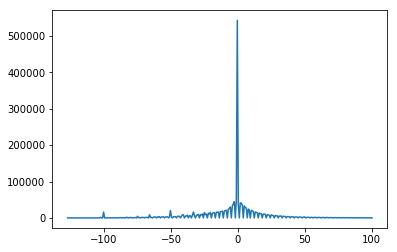

In [94]:
bin_pos = []
counts = []
for pair in q.response['change_abs']:
    bin_left, count = pair
    bin_pos.append(bin_left)
    counts.append(count)
bin_pos = np.array(bin_pos)
counts = np.array(counts)

y_value = counts[1:]
x_value = bin_pos[1:]

plt.plot(x_value, y_value)

plt.show()

In [91]:
sql = 'SELECT ST_HISTOGRAM(rast, 3, auto, true) from '+tableName
q = SQL2GEE(sql)
q.response

{u'change_norm': [[-128.0, 129264.0],
  [-127.27987421383648, 0.0],
  [-126.55974842767296, 0.0],
  [-125.83962264150944, 0.0],
  [-125.11949685534591, 0.0],
  [-124.3993710691824, 0.0],
  [-123.67924528301887, 0.0],
  [-122.95911949685535, 0.0],
  [-122.23899371069183, 0.0],
  [-121.51886792452831, 0.0],
  [-120.79874213836479, 0.0],
  [-120.07861635220127, 0.0],
  [-119.35849056603774, 0.0],
  [-118.63836477987421, 0.0],
  [-117.91823899371069, 0.0],
  [-117.19811320754717, 0.0],
  [-116.47798742138365, 0.0],
  [-115.75786163522012, 0.0],
  [-115.0377358490566, 0.0],
  [-114.31761006289308, 0.0],
  [-113.59748427672956, 0.0],
  [-112.87735849056604, 0.0],
  [-112.15723270440252, 0.0],
  [-111.437106918239, 0.0],
  [-110.71698113207547, 0.0],
  [-109.99685534591195, 0.0],
  [-109.27672955974843, 0.0],
  [-108.55660377358491, 0.0],
  [-107.83647798742139, 0.0],
  [-107.11635220125787, 0.0],
  [-106.39622641509433, 0.0],
  [-105.67610062893081, 0.0],
  [-104.95597484276729, 0.0],
  [-10

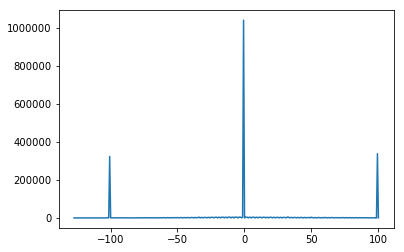

In [92]:
bin_pos = []
counts = []
for pair in q.response['change_norm']:
    bin_left, count = pair
    bin_pos.append(bin_left)
    counts.append(count)
bin_pos = np.array(bin_pos)
counts = np.array(counts)

y_value = counts[1:]
x_value = bin_pos[1:]

plt.plot(x_value, y_value)

plt.show()

In [88]:
sql = 'SELECT ST_HISTOGRAM(rast, 6, auto, true) from '+tableName
q = SQL2GEE(sql)
q.response

{u'transition': [[0.0, 1779.0],
  [0.1527777777777778, 0.0],
  [0.3055555555555556, 0.0],
  [0.45833333333333337, 0.0],
  [0.6111111111111112, 0.0],
  [0.763888888888889, 0.0],
  [0.9166666666666667, 1036046.0],
  [1.0694444444444446, 0.0],
  [1.2222222222222223, 0.0],
  [1.375, 0.0],
  [1.527777777777778, 0.0],
  [1.6805555555555558, 0.0],
  [1.8333333333333335, 0.0],
  [1.9861111111111112, 77097.0],
  [2.1388888888888893, 0.0],
  [2.291666666666667, 0.0],
  [2.4444444444444446, 0.0],
  [2.5972222222222223, 0.0],
  [2.75, 0.0],
  [2.902777777777778, 16695.0],
  [3.055555555555556, 0.0],
  [3.2083333333333335, 0.0],
  [3.3611111111111116, 0.0],
  [3.5138888888888893, 0.0],
  [3.666666666666667, 0.0],
  [3.8194444444444446, 0.0],
  [3.9722222222222223, 150553.0],
  [4.125, 0.0],
  [4.277777777777779, 0.0],
  [4.430555555555556, 0.0],
  [4.583333333333334, 0.0],
  [4.736111111111112, 0.0],
  [4.888888888888889, 349712.0],
  [5.041666666666667, 0.0],
  [5.194444444444445, 0.0],
  [5.34722

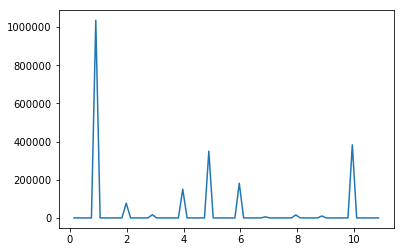

In [90]:
bin_pos = []
counts = []
for pair in q.response['transition']:
    bin_left, count = pair
    bin_pos.append(bin_left)
    counts.append(count)
bin_pos = np.array(bin_pos)
counts = np.array(counts)

y_value = counts[1:]
x_value = bin_pos[1:]

plt.plot(x_value, y_value)

plt.show()

## Querying Carto Rasters

In [73]:
import cartoframes
username = 'wri-rw' # <-- insert your username here
api_key = '' # <-- insert your API key here
tablename = 'coralreefhotspots' # <-- insert your tablename here

cc = cartoframes.CartoContext('https://wri-rw.carto.com/'.format(username),
                              api_key)
df = cc.read(tablename)
df.head()

,the_raster_webmercator
cartodb_id,
1,010000010064A8EC9D829AA93F2FB73FA26B9BA9BF0000...
2,010000010064A8EC9D829AA93F2FB73FA26B9BA9BFBD9A...
3,010000010064A8EC9D829AA93F2FB73FA26B9BA9BF7A35...
4,010000010064A8EC9D829AA93F2FB73FA26B9BA9BF37D0...
5,010000010064A8EC9D829AA93F2FB73FA26B9BA9BFF46A...


In [166]:
df_buffer = cc.query(query='''
                           select st_summarystats(the_raster_webmercator, 1) as stats from coralreefhotspots
                          ''')
df_buffer.head()

,stats
0,"(16384,0,0,0,0,0)"
1,"(16384,0,0,0,0,0)"
2,"(16384,0,0,0,0,0)"
3,"(16384,0,0,0,0,0)"
4,"(16384,0,0,0,0,0)"


In [167]:
df_buffer = cc.query(query='''
                           select ST_SummaryStatsAgg(the_raster_webmercator, 1, True) as stats from coralreefhotspots
                          ''')
df_buffer.head()

,stats
0,"(17131817,6821046,0.398150762408914,0.79456348..."


In [98]:
df_buffer = cc.query(query='''
                          select sum(count) as count, value from(select (ST_ValueCount(the_raster_webmercator, 1)).*  from coralreefhotspots) as r group by value
                          ''')
df_buffer.tail(10)

,count,value
0,12703598.0,0.0
1,2775909.0,1.0
2,1133753.0,2.0
3,296597.0,3.0
4,221960.0,4.0


In [143]:
df_buffer = cc.query(query='''
                          SELECT ST_BandMetaData(the_raster_webmercator, 1) from coralreefhotspots
                          ''')
df_buffer.tail(10)

,st_bandmetadata
1643,"(16BSI,-1,f,)"
1644,"(16BSI,-1,f,)"
1645,"(16BSI,-1,f,)"
1646,"(16BSI,-1,f,)"
1647,"(16BSI,-1,f,)"
1648,"(16BSI,-1,f,)"
1649,"(16BSI,-1,f,)"
1650,"(16BSI,-1,f,)"
1651,"(16BSI,-1,f,)"
1652,"(16BSI,-1,f,)"


In [148]:
df_buffer = cc.query(query='''SELECT band, (stats).*
    FROM (SELECT band, ST_Histogram(the_raster_webmercator, band) As stats
    FROM coralreefhotspots CROSS JOIN generate_series(1,3) As band) As foo;
                          ''')
df_buffer.head(10)

,count,band,max,percent,min
0,16384.0,1.0,0.0,-1.0,0.0
1,16384.0,1.0,0.0,-1.0,0.0
2,16384.0,1.0,0.0,-1.0,0.0
3,16384.0,1.0,0.0,-1.0,0.0
4,16384.0,1.0,0.0,-1.0,0.0
5,16384.0,1.0,0.0,-1.0,0.0
6,16384.0,1.0,0.0,-1.0,0.0
7,16384.0,1.0,0.0,-1.0,0.0
8,16384.0,1.0,0.0,-1.0,0.0
9,16384.0,1.0,0.0,-1.0,0.0


## Querying API

##### The API is not supporting subqueries and some postgis functions in this moment. We would try to do some queries and if any is not implemented, we will do it directly to Carto

In [137]:
# Import the modules
import requests
import json

In [157]:
#Simple query to the API
r = requests.get('https://api.resourcewatch.org/query?sql=select count(*) from ad790c87-fe9e-4405-891d-de7c2ddfda79/') 
r.status_code

200

In [139]:
r.json()

{u'data': [{u'count': 1653}],
 u'meta': {u'cloneUrl': {u'body': {u'dataset': {u'application': [u'your',
      u'apps'],
     u'datasetUrl': u'/query/ad790c87-fe9e-4405-891d-de7c2ddfda79'}},
   u'http_method': u'POST',
   u'url': u'/dataset/ad790c87-fe9e-4405-891d-de7c2ddfda79/clone'}}}

In [123]:
#st_summarystats
r = requests.get('https://api.resourcewatch.org/query?sql=select st_summarystats(the_raster_webmercator, 1) as stats from ad790c87-fe9e-4405-891d-de7c2ddfda79') 
print "Status: ",r.status_code
print r.content

Status:  200
{"data":[{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,119,0.00726318359375,0.114855888270186,0,2)"},{"stats":"(16384,114,0.0069580078125,0.11026612071385,0,2)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(16384,0,0,0,0,0)"},{"stats":"(163

In [124]:
#ST_MetaData
r = requests.get('https://api.resourcewatch.org/query?sql=SELECT ST_MetaData(the_raster_webmercator) from ad790c87-fe9e-4405-891d-de7c2ddfda79') 
print "Status: ",r.status_code
print r.content

Status:  200
{"data":[{"st_metadata":"(-180.025000000373,90.0250000003725,128,128,0.0500069444445479,-0.0500138888890959,0,0,4326,1)"},{"st_metadata":"(-173.62411111147,90.0250000003725,128,128,0.0500069444445479,-0.0500138888890959,0,0,4326,1)"},{"st_metadata":"(-167.223222222568,90.0250000003725,128,128,0.0500069444445479,-0.0500138888890959,0,0,4326,1)"},{"st_metadata":"(-160.822333333666,90.0250000003725,128,128,0.0500069444445479,-0.0500138888890959,0,0,4326,1)"},{"st_metadata":"(-154.421444444764,90.0250000003725,128,128,0.0500069444445479,-0.0500138888890959,0,0,4326,1)"},{"st_metadata":"(-148.020555555862,90.0250000003725,128,128,0.0500069444445479,-0.0500138888890959,0,0,4326,1)"},{"st_metadata":"(-141.61966666696,90.0250000003725,128,128,0.0500069444445479,-0.0500138888890959,0,0,4326,1)"},{"st_metadata":"(-135.218777778058,90.0250000003725,128,128,0.0500069444445479,-0.0500138888890959,0,0,4326,1)"},{"st_metadata":"(-128.817888889155,90.0250000003725,128,128,0.05000694444454

In [160]:
#ST_BandMetaData
r = requests.get('https://api.resourcewatch.org/query?sql=SELECT ST_BandMetaData(the_raster_webmercator, 1) from ad790c87-fe9e-4405-891d-de7c2ddfda79') 
print "Status: ",r.status_code
print r.content

Status:  200
{"data":[{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_bandmetadata":"(16BSI,-1,f,)"},{"st_b

In [132]:
#ST_Histogram
r = requests.get('https://api.resourcewatch.org/query?sql=SELECT ST_Histogram(the_raster_webmercator, 1) FROM ad790c87-fe9e-4405-891d-de7c2ddfda79 ') 
print "Status: ",r.status_code
print r.content

Status:  200
{"data":[{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0,16384,-1)"},{"st_histogram":"(0,0.133333333333333,16314,0.9957275390625)"},{"st_histogram":"(0.133333333333333,0.266666666666667,0,0)"},{"st_histogram":"(0.266666666666667,0.4,0,0)"},{"st_histogram":"(0.4,0.533333333333333,0,0)"},{"st_histogr

In [136]:
r.headers

{'X-Response-Time': '15737 ms', 'Content-Length': '89139', 'Vary': 'Origin', 'Server': 'nginx/1.4.6 (Ubuntu)', 'Connection': 'keep-alive', 'Date': 'Wed, 09 Aug 2017 14:30:03 GMT', 'Content-Type': 'application/json; charset=utf-8'}

In [155]:
#Query in Carto
df_buffer = cc.query(query='''
                          select sum(count) as count, value from(select (ST_ValueCount(the_raster_webmercator, 1)).*  from coralreefhotspots) as r group by value
                          ''')
df_buffer.tail(10)

,count,value
0,12703598.0,0.0
1,2775909.0,1.0
2,1133753.0,2.0
3,296597.0,3.0
4,221960.0,4.0


In [161]:
#Same query to the api
r = requests.get('https://api.resourcewatch.org/query?sql=SELECT sum(count) as count, value FROM (select (ST_ValueCount(the_raster_webmercator, 1)).*  from ad790c87-fe9e-4405-891d-de7c2ddfda79) as r group by value') 
print "Status: ",r.status_code
print r.content

Status:  500
{"errors":[{"status":500,"detail":"Cannot read property 'value' of undefined"}]}
